In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Drop the 'Id' column
df = df.drop('Id', axis=1)
df.shape

(1460, 80)

## 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [6]:
# Descriptive statistics for SalePrice
desc_stats = df['SalePrice'].describe()
print("Descriptive Statistics for SalePrice:\n", desc_stats)

Descriptive Statistics for SalePrice:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


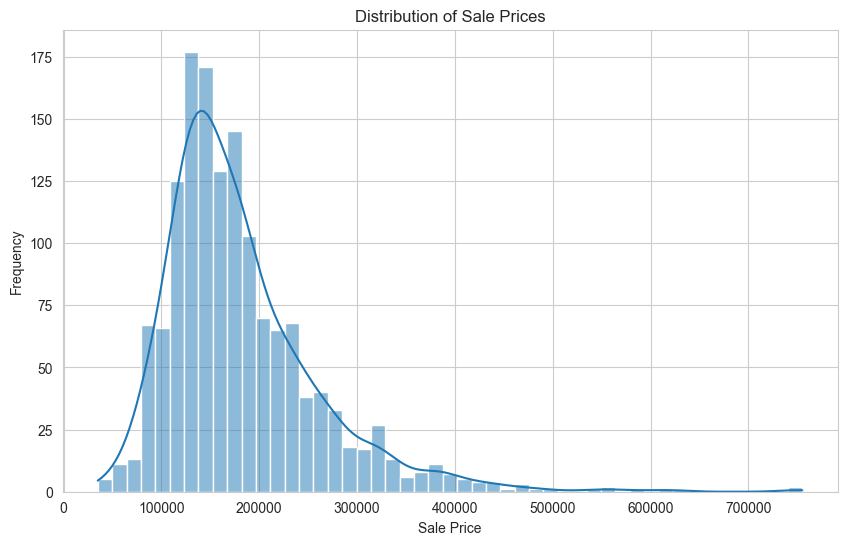

In [7]:
# Histogram with Kernel Density Estimate (KDE) for SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


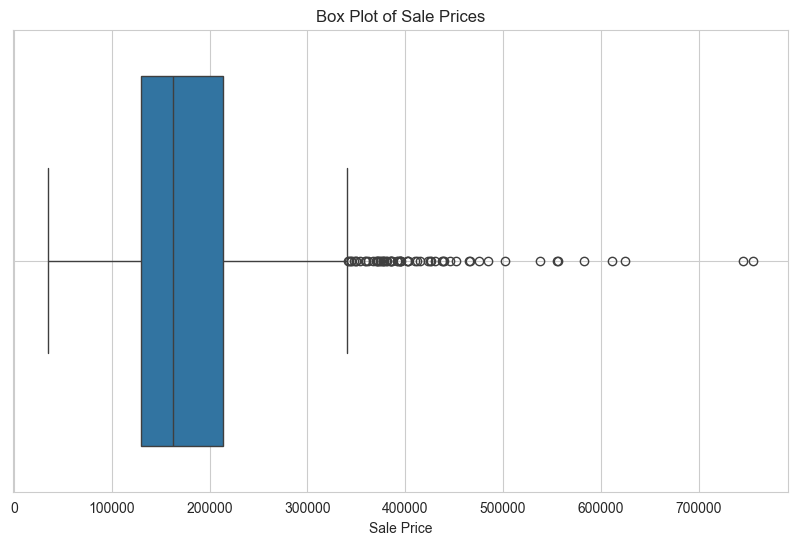

In [8]:
# Box plot for SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.grid(True)
plt.show()

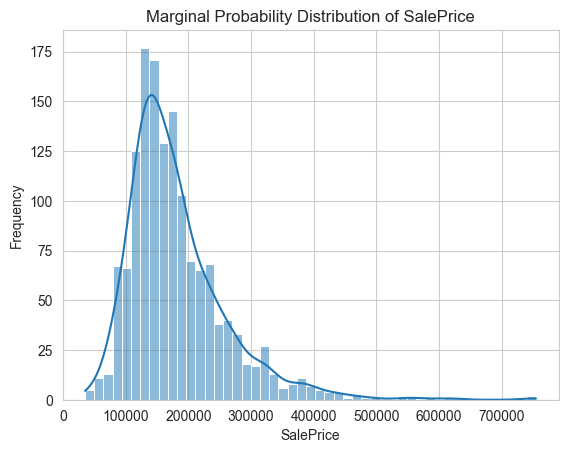

In [9]:
# Plot the marginal probability distribution of 'SalePrice'
sns.histplot(df['SalePrice'], kde=True)

plt.title('Marginal Probability Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

## 2. Investigate missing data and outliers.

In [10]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

print(f"Number of columns with missing values: {len(columns_with_missing_values)}")
print("Names of Columns with Missing Data:\n", columns_with_missing_values)

Number of columns with missing values: 19
Names of Columns with Missing Data:
 ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
# Calculate percentage of missing values for each column
missing_percentage_dict = {}
for column in columns_with_missing_values:
    missing_count = df[column].isnull().sum()
    total_count = len(df)
    missing_percentage = (missing_count / total_count) * 100
    missing_percentage_dict[column] = missing_percentage

# Sort and print the percentage of missing values in descending order
sorted_missing_percentage = sorted(missing_percentage_dict.items(), key=lambda x: x[1], reverse=True)
for column, missing_percentage in sorted_missing_percentage:
    print(f"Percentage of missing values in {column}: {missing_percentage:.2f}%")

Percentage of missing values in PoolQC: 99.52%
Percentage of missing values in MiscFeature: 96.30%
Percentage of missing values in Alley: 93.77%
Percentage of missing values in Fence: 80.75%
Percentage of missing values in MasVnrType: 59.73%
Percentage of missing values in FireplaceQu: 47.26%
Percentage of missing values in LotFrontage: 17.74%
Percentage of missing values in GarageType: 5.55%
Percentage of missing values in GarageYrBlt: 5.55%
Percentage of missing values in GarageFinish: 5.55%
Percentage of missing values in GarageQual: 5.55%
Percentage of missing values in GarageCond: 5.55%
Percentage of missing values in BsmtExposure: 2.60%
Percentage of missing values in BsmtFinType2: 2.60%
Percentage of missing values in BsmtQual: 2.53%
Percentage of missing values in BsmtCond: 2.53%
Percentage of missing values in BsmtFinType1: 2.53%
Percentage of missing values in MasVnrArea: 0.55%
Percentage of missing values in Electrical: 0.07%


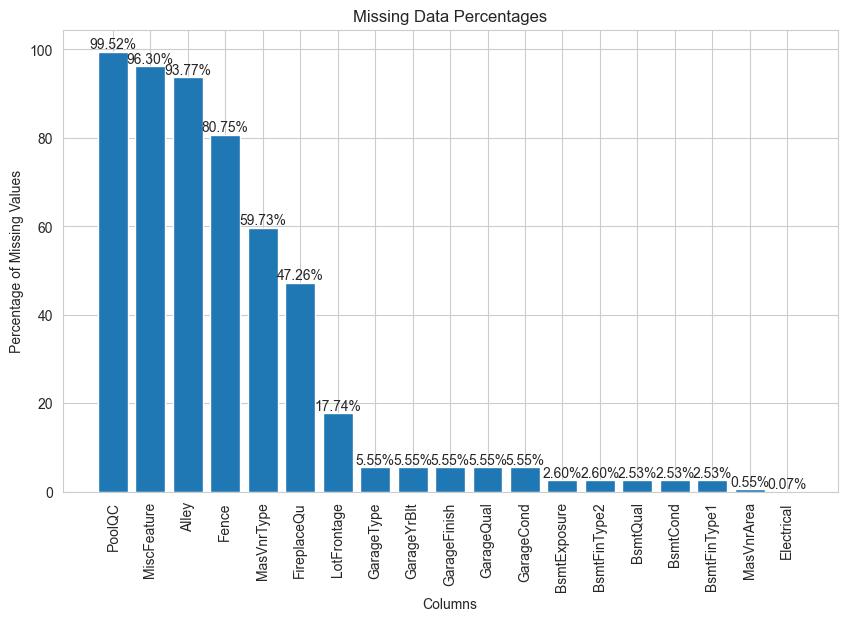

In [12]:
# Segregate the values
sorted_columns = [item[0] for item in sorted_missing_percentage]
sorted_percentages = [item[1] for item in sorted_missing_percentage]

# Plot the sorted missing data percentages
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_percentages)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Data Percentages')
plt.xticks(rotation=90)

# Add data labels to the bar plot
for i, v in enumerate(sorted_percentages):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

1.	High Missing Values Approach (Above 40%): For features with very high missing values like PoolQC, MiscFeature, and Alley, it's effective to transform them into binary indicators that signal the presence or absence of the feature. However, for those with over 50% missing data, and where it's unclear if the data is missing or unrecorded, we have decided to remove these features from the analysis to avoid skewing results with unreliable data.
2.	Handling Moderate and Low Missing Values (Below 40%): For features with moderate to low missing data, we'll use median and mode imputation to fill in the gaps in continous and discrete features respectively, ensuring a straightforward and effective approach to maintain data integrity for our analysis.


In [13]:
# Drop columns with more than 40% missing values
columns_to_drop = [column for column, percentage in missing_percentage_dict.items() if percentage > 40]
df_dropped = df.drop(columns_to_drop, axis=1)

# Impute missing values with the median for numeric columns 
#         and the most frequent value for discrete variables
for column in df_dropped.columns:
    if df_dropped[column].isnull().any():
        if df_dropped[column].dtype != 'object':
            median_value = df_dropped[column].median()
            df_dropped[column].fillna(median_value, inplace=True)
        else:
            most_frequent_value = df_dropped[column].mode()[0]
            df_dropped[column].fillna(most_frequent_value, inplace=True)

# Step 4: Verify the percentage of missing values after dropping and imputing
missing_percentage_dict_after = {}
for column in df_dropped.columns:
    missing_count = df_dropped[column].isnull().sum()
    total_count = len(df_dropped)
    missing_percentage = (missing_count / total_count) * 100
    missing_percentage_dict_after[column] = missing_percentage

# Updating the dataframe
df = df_dropped

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print(f"Number of columns with missing values: {len(columns_with_missing_values)}")

Number of columns with missing values: 0


In [14]:
# Identify columns with character values
character_columns = df.select_dtypes(include=['object']).columns.tolist()

# Factorize character columns using pd.Categorical
factorized_dict = {}
for column in character_columns:
    df[column] = pd.Categorical(df[column])
    factorized_values = df[column].cat.codes
    factor_dict = dict(zip(df[column], factorized_values))
    factorized_dict[column] = factor_dict

# Print the dictionaries for the factors
for column, factor_dict in factorized_dict.items():
    print(f"Factor dictionary for {column}:")
    print(factor_dict)
    print()


Factor dictionary for MSZoning:
{'RL': 3, 'RM': 4, 'C (all)': 0, 'FV': 1, 'RH': 2}

Factor dictionary for Street:
{'Pave': 1, 'Grvl': 0}

Factor dictionary for LotShape:
{'Reg': 3, 'IR1': 0, 'IR2': 1, 'IR3': 2}

Factor dictionary for LandContour:
{'Lvl': 3, 'Bnk': 0, 'Low': 2, 'HLS': 1}

Factor dictionary for Utilities:
{'AllPub': 0, 'NoSeWa': 1}

Factor dictionary for LotConfig:
{'Inside': 4, 'FR2': 2, 'Corner': 0, 'CulDSac': 1, 'FR3': 3}

Factor dictionary for LandSlope:
{'Gtl': 0, 'Mod': 1, 'Sev': 2}

Factor dictionary for Neighborhood:
{'CollgCr': 5, 'Veenker': 24, 'Crawfor': 6, 'NoRidge': 15, 'Mitchel': 11, 'Somerst': 21, 'NWAmes': 14, 'OldTown': 17, 'BrkSide': 3, 'Sawyer': 19, 'NridgHt': 16, 'NAmes': 12, 'SawyerW': 20, 'IDOTRR': 9, 'MeadowV': 10, 'Edwards': 7, 'Timber': 23, 'Gilbert': 8, 'StoneBr': 22, 'ClearCr': 4, 'NPkVill': 13, 'Blmngtn': 0, 'BrDale': 2, 'SWISU': 18, 'Blueste': 1}

Factor dictionary for Condition1:
{'Norm': 2, 'Feedr': 1, 'PosN': 4, 'Artery': 0, 'RRAe': 5, 'RR

In [15]:
na_counts = df.isna().sum()
# Find columns where the count of NaN values is greater than 0
columns_with_na = na_counts[na_counts > 0]
print(f"Number of columns with NaN values > 0: {len(columns_with_na)}")

Number of columns with NaN values > 0: 0


In [16]:
# Create a new DataFrame with factorized values
df_factorized = df.copy()
for column, factor_dict in factorized_dict.items():
    if column in df.columns:
        # Use map to replace with factorized values
        df_factorized[column] = df[column].map(factor_dict)
        df_factorized[column] = df_factorized[column].astype('Int64')  # Notice the capital 'I' in 'Int64'

# Replace df with df_factorized
df = df_factorized

# Check the columns with non-numeric data types in df
non_numeric_columns = df.select_dtypes(exclude=[np.number, 'datetime64']).columns.tolist()
print(f"Number of columns with non-numeric values in df: {len(non_numeric_columns)}")

# Check the columns with numeric data types in df
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Number of columns with numeric values in df: {len(numeric_columns)}")


Number of columns with non-numeric values in df: 0
Number of columns with numeric values in df: 74


In [17]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,0.99589,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.027677,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.5521,1.100854,79442.502883
min,20.000000,0.0,21.000000,1300.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.0,0.0,34900.000000
25%,20.000000,3.0,60.000000,7553.500000,1.0,0.0,3.0,0.0,2.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.0,4.0,129975.000000
50%,50.000000,3.0,69.000000,9478.500000,1.0,3.0,3.0,0.0,4.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.0,4.0,163000.000000
75%,70.000000,3.0,79.000000,11601.500000,1.0,3.0,3.0,0.0,4.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.0,4.0,214000.000000
max,190.000000,4.0,313.000000,215245.000000,1.0,3.0,3.0,1.0,4.0,2.0,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.0,5.0,755000.000000


In [18]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
len(numerical_features)

74

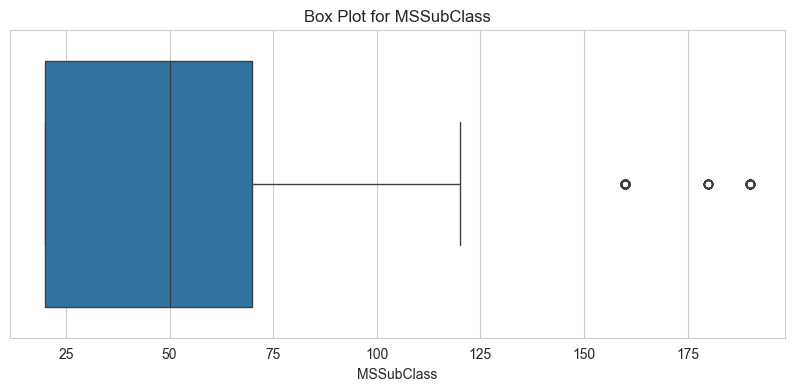

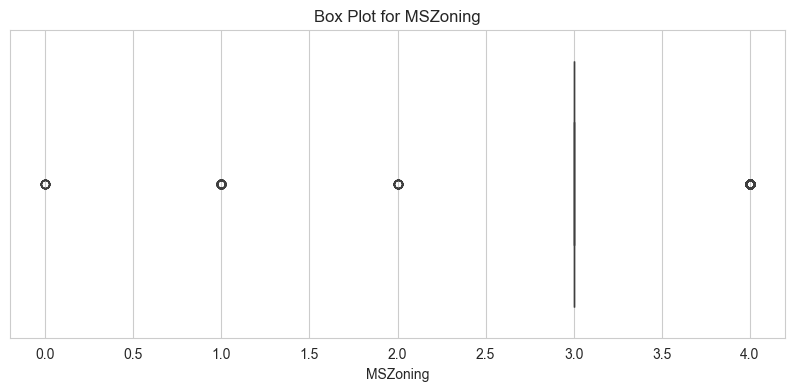

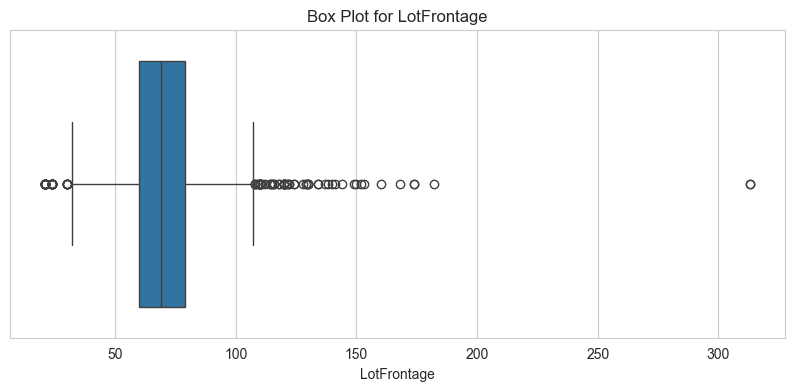

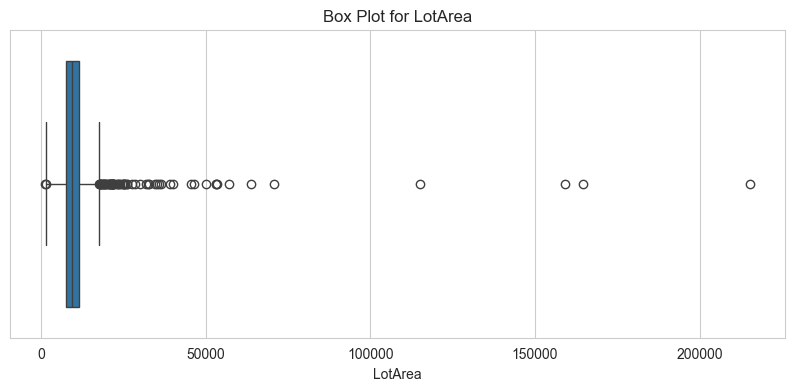

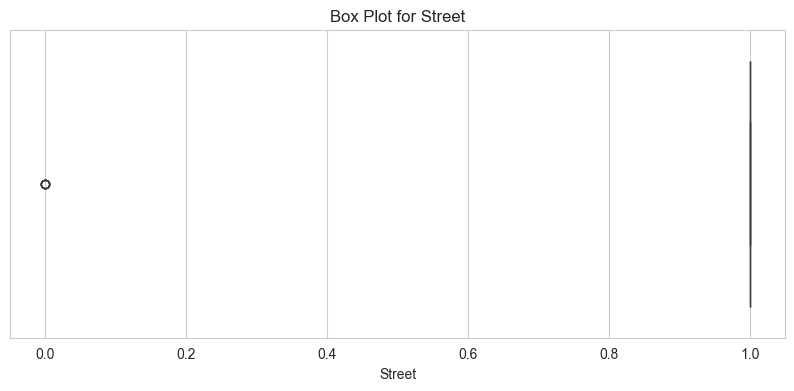

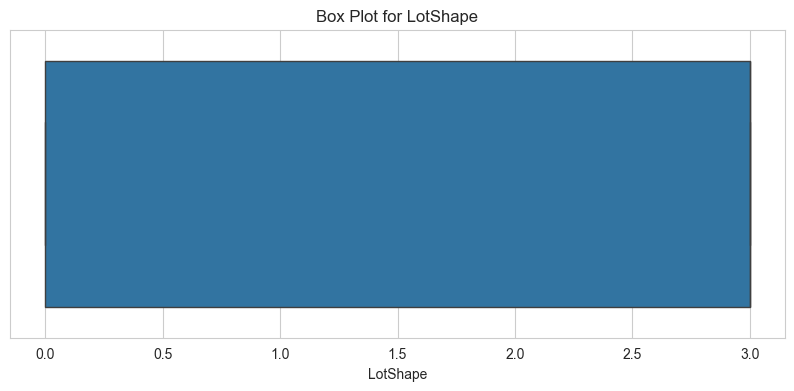

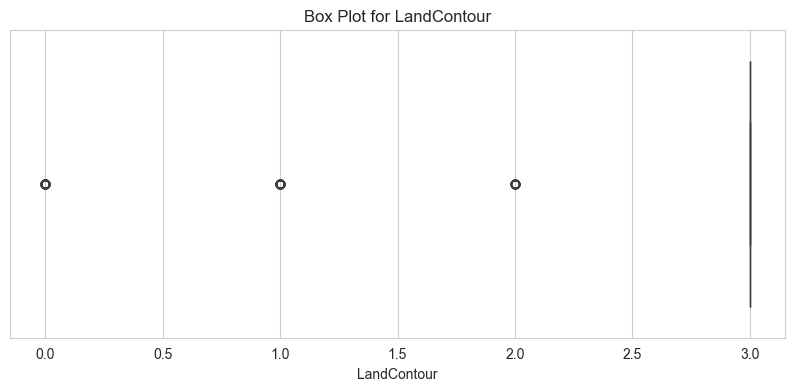

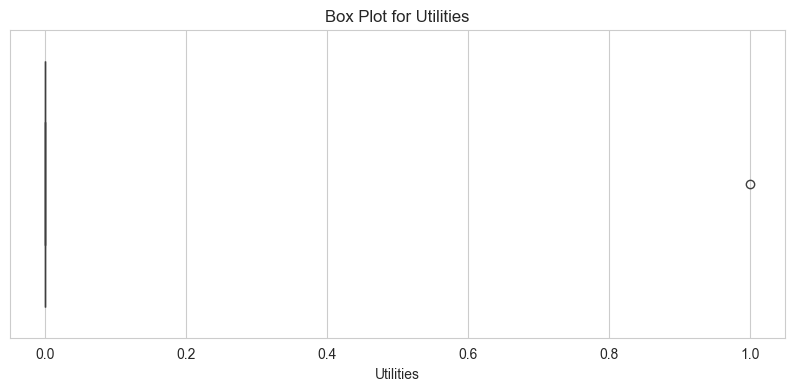

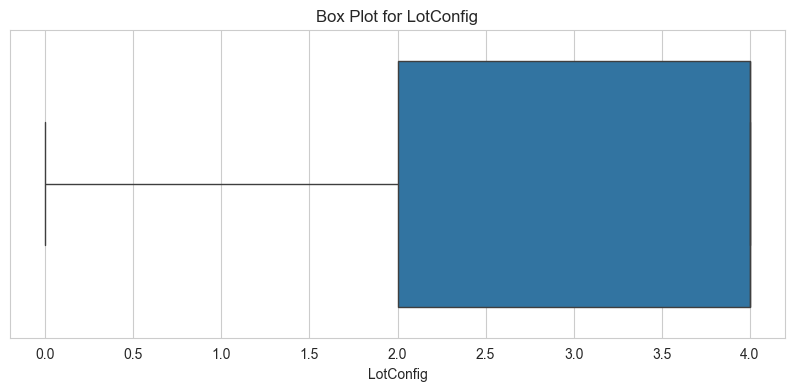

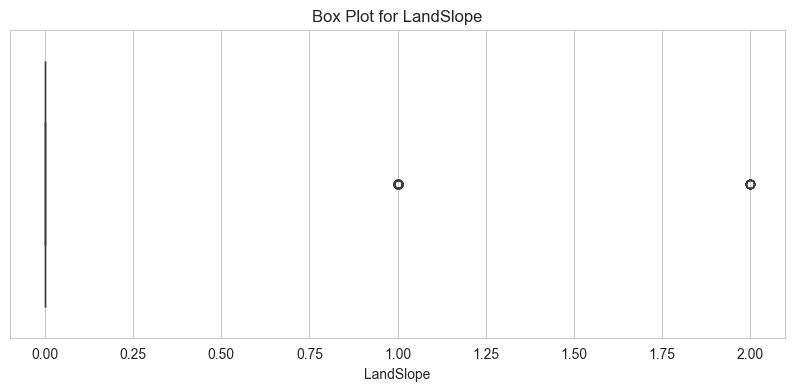

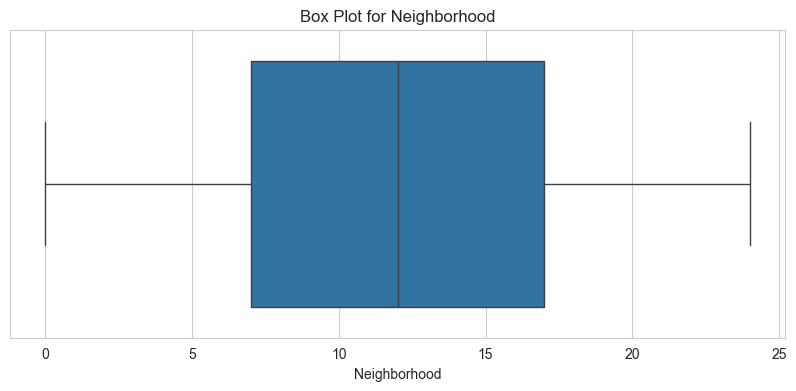

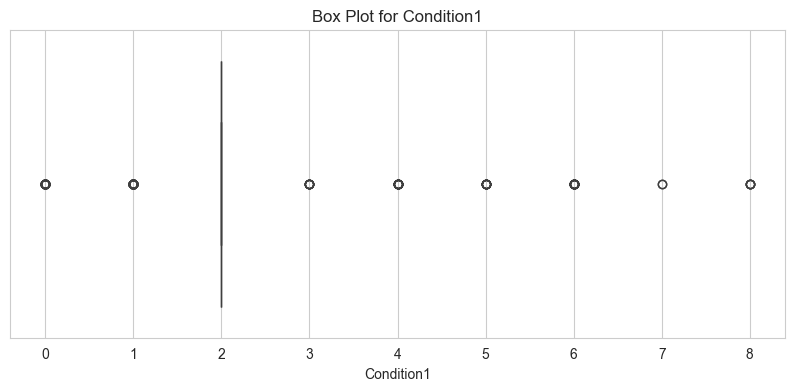

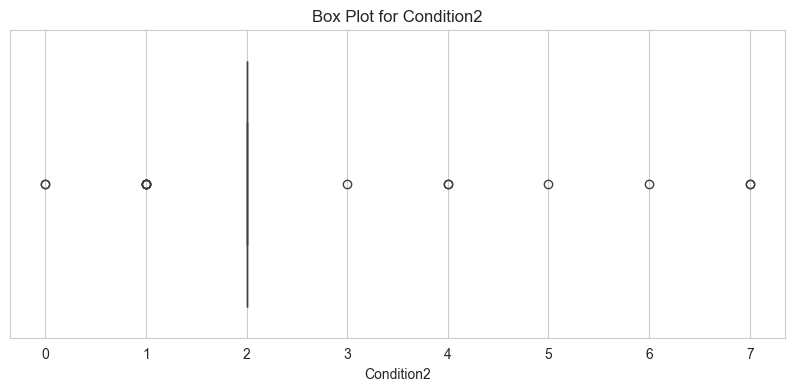

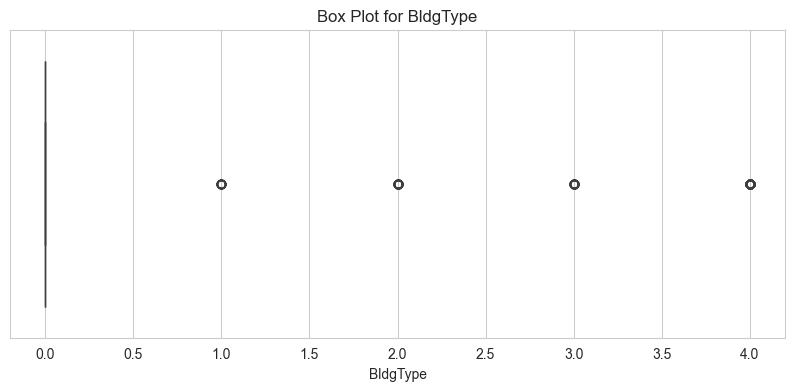

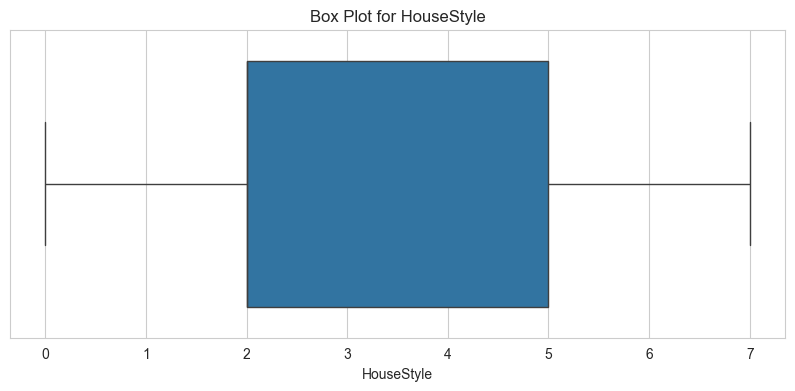

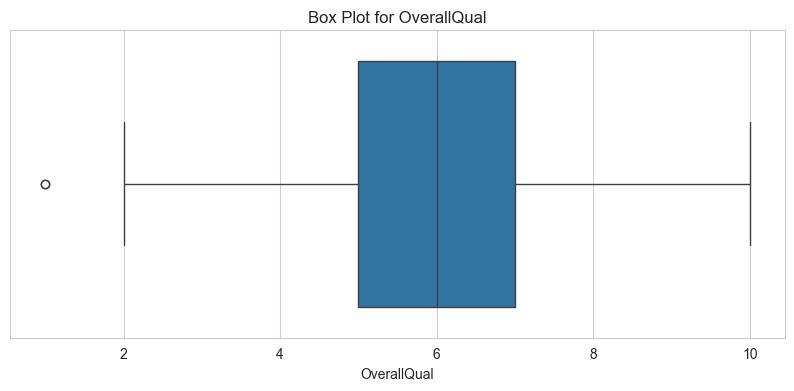

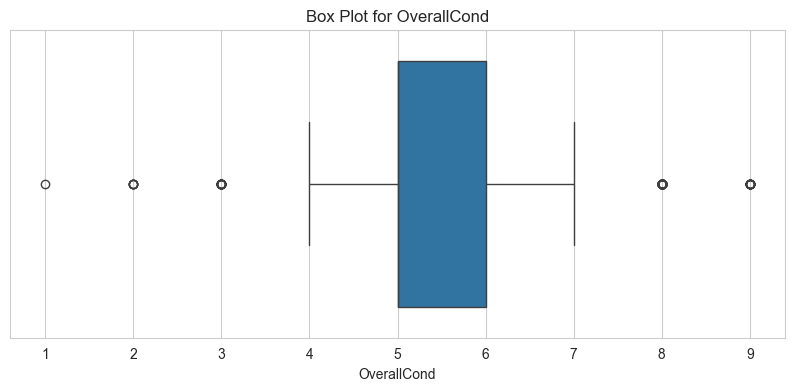

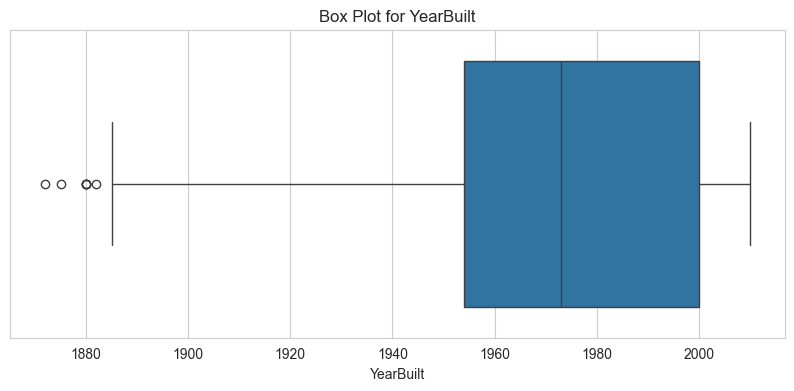

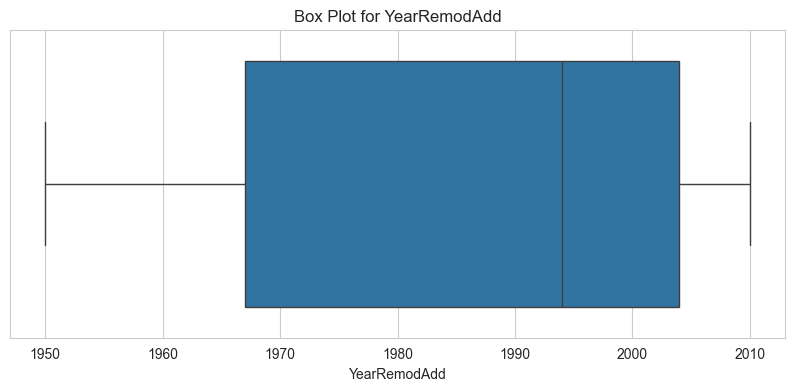

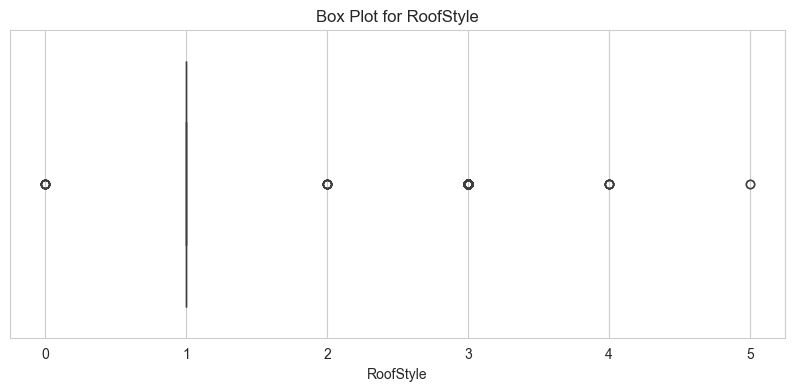

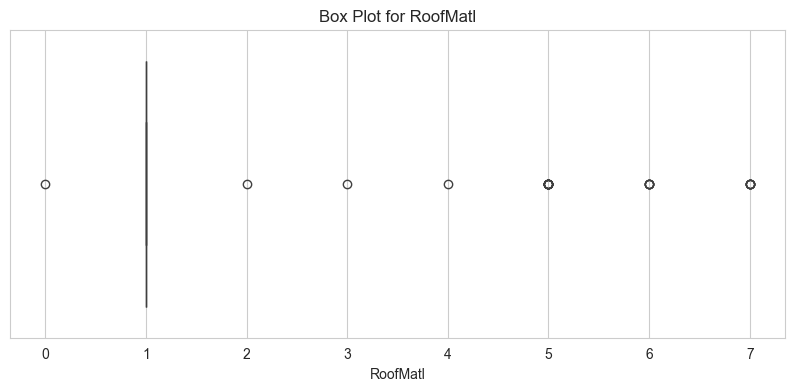

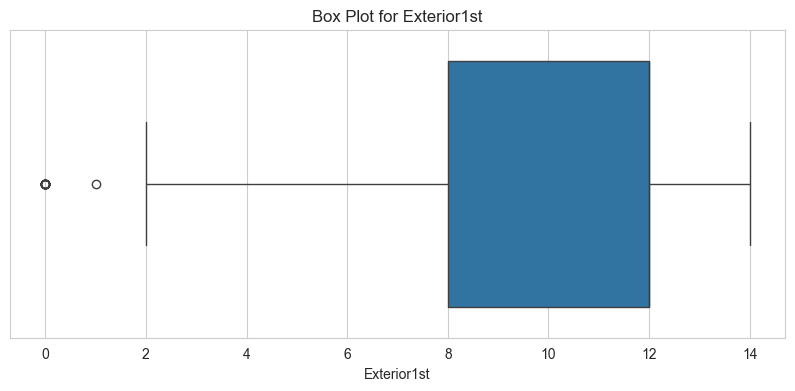

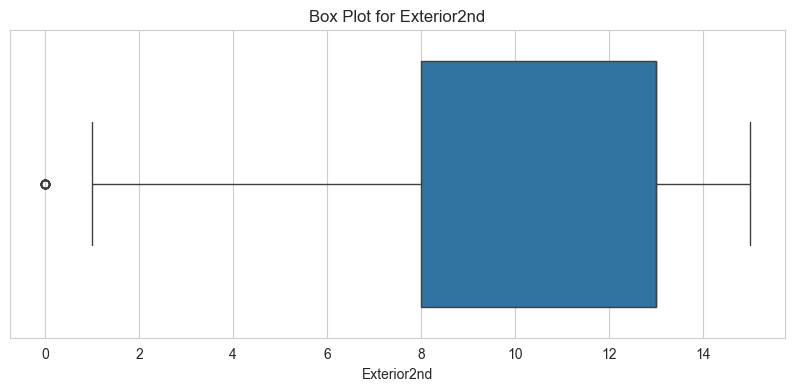

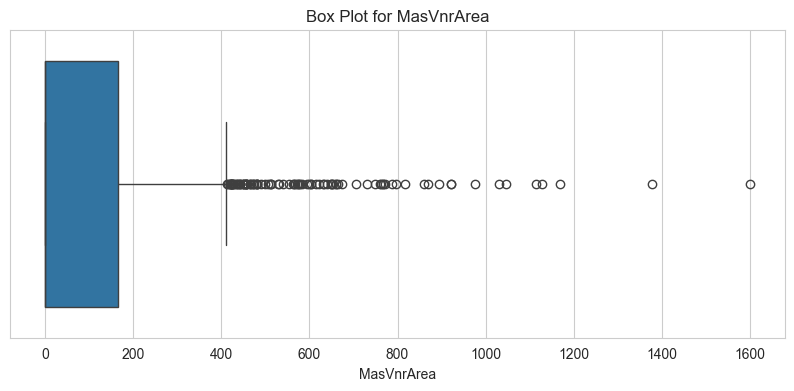

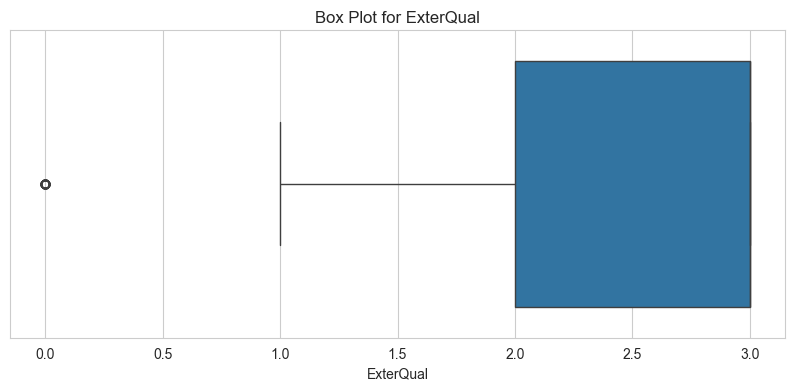

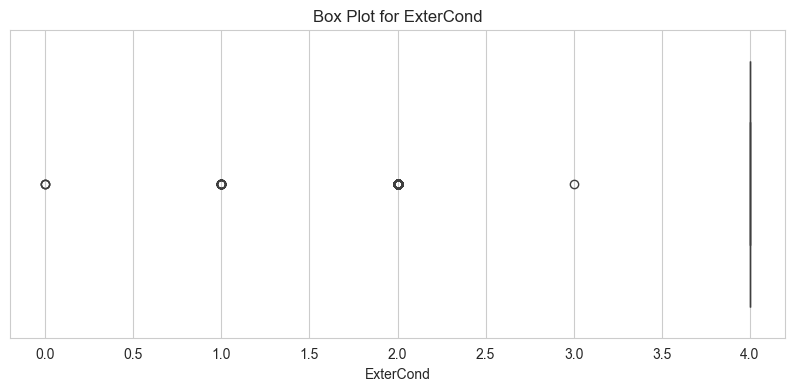

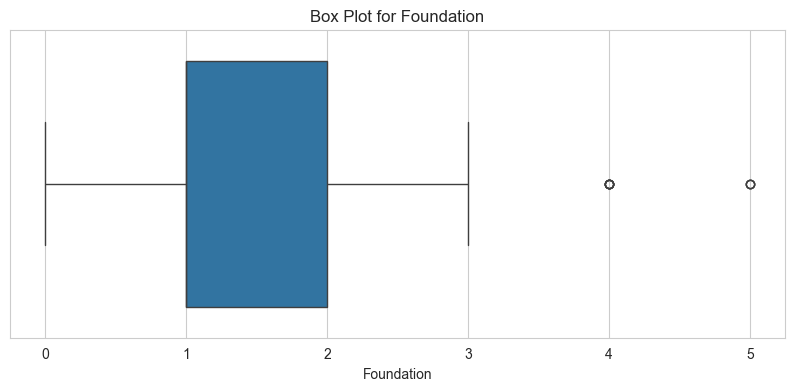

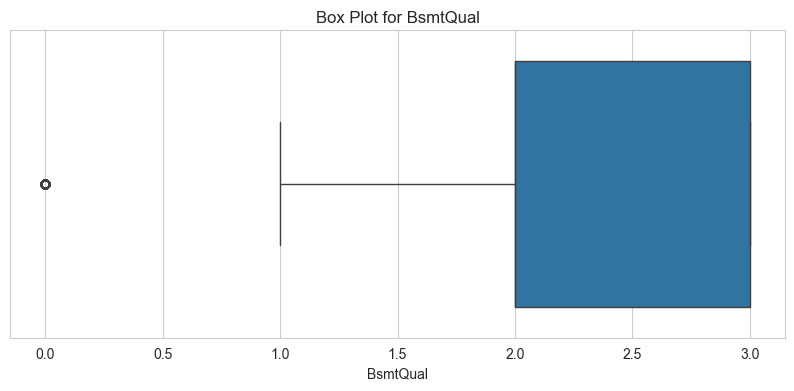

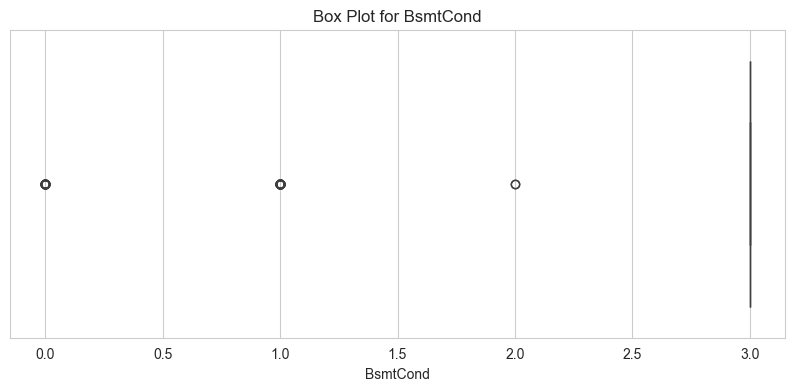

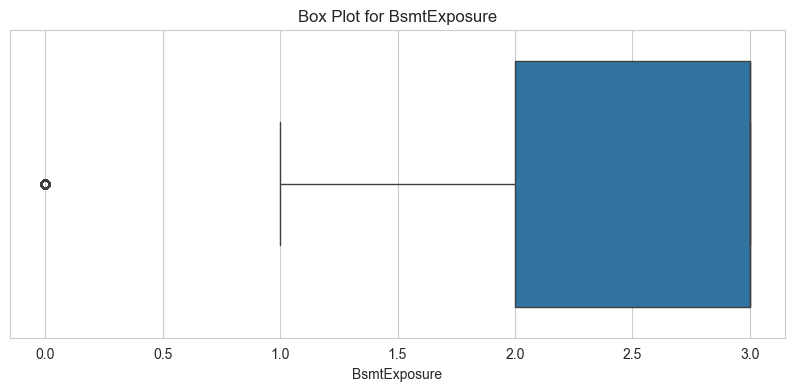

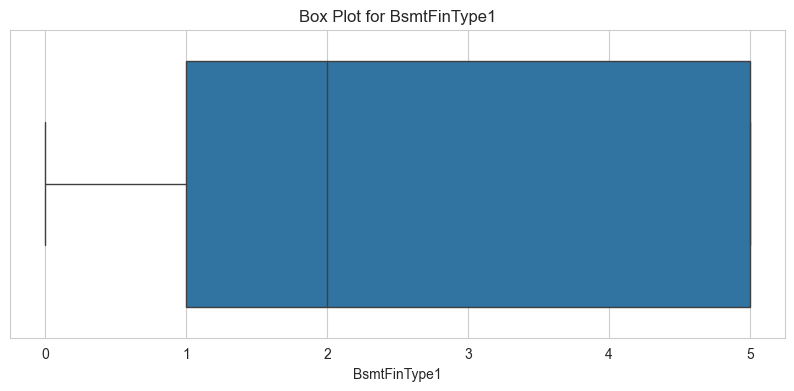

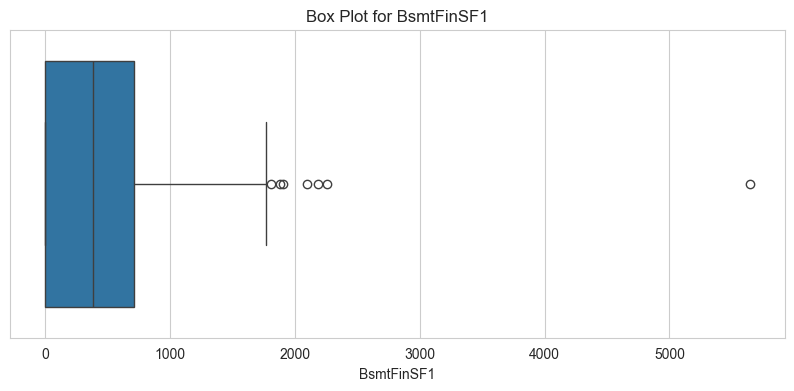

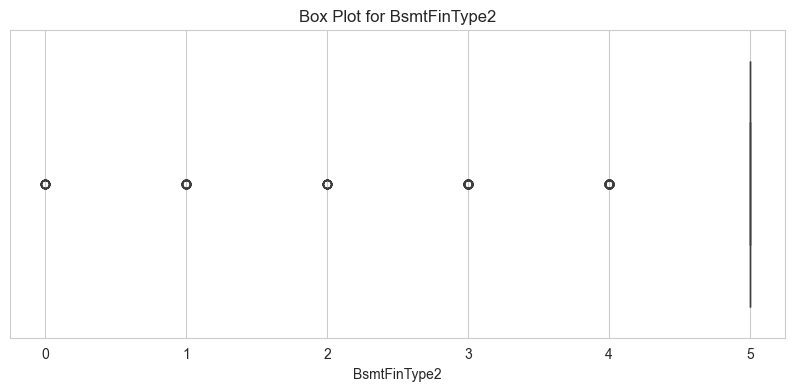

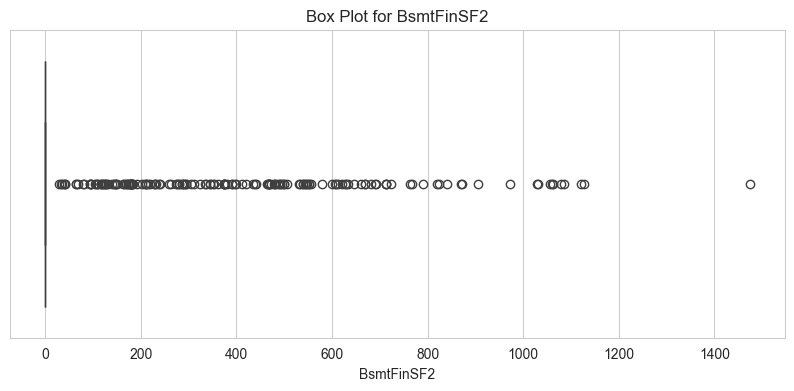

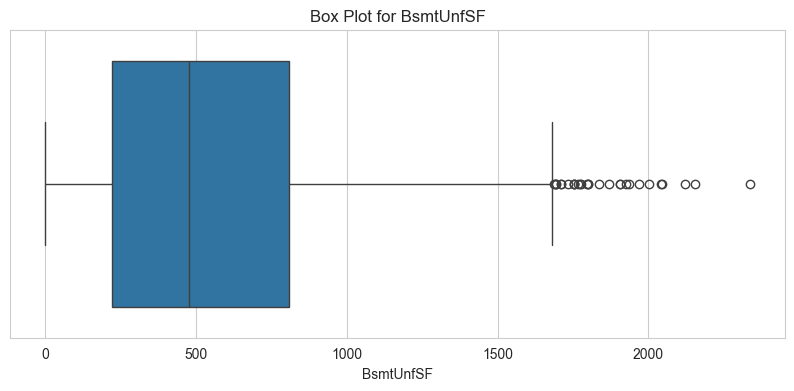

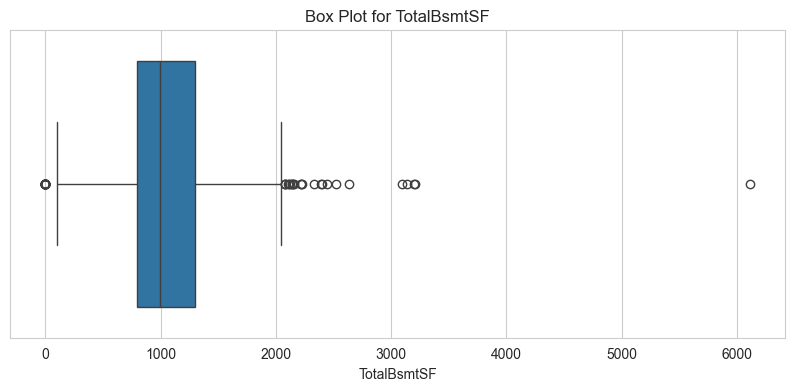

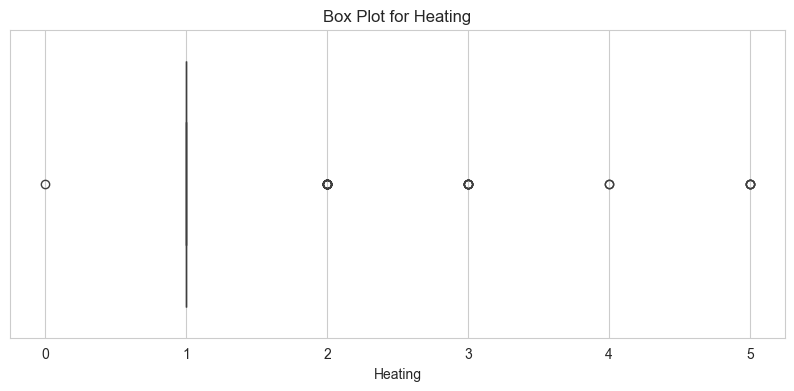

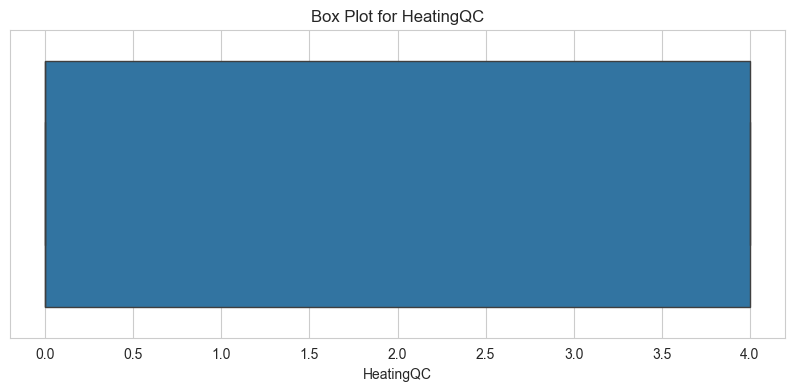

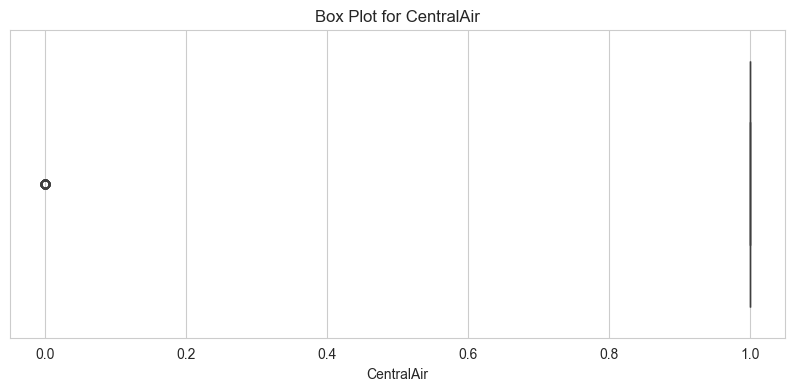

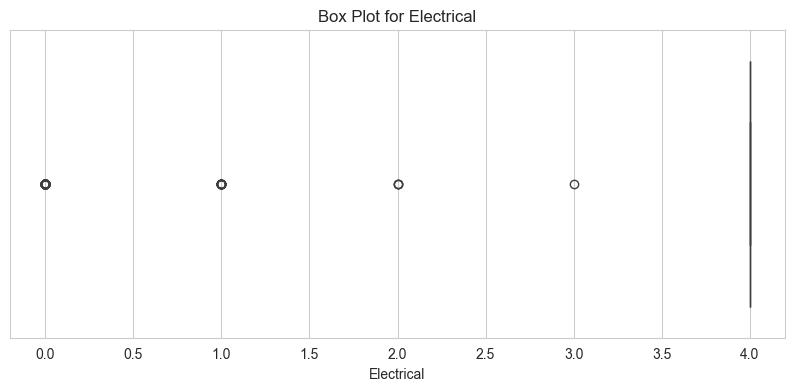

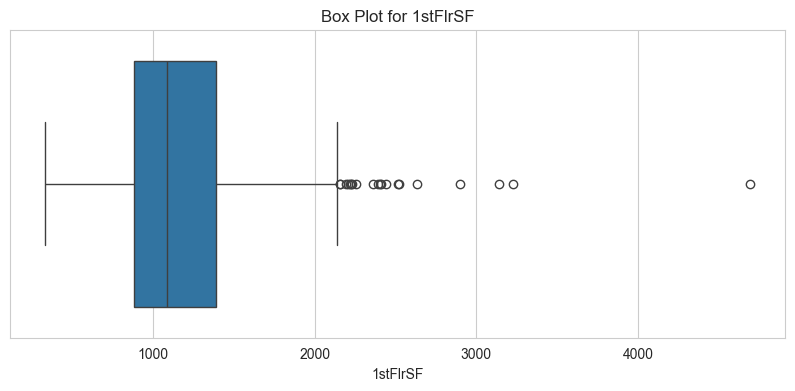

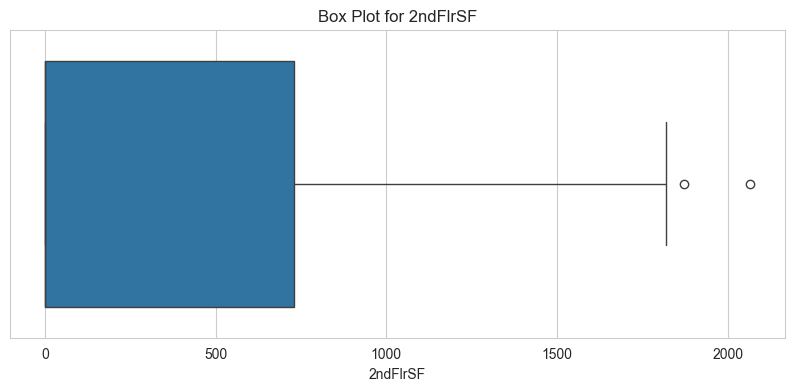

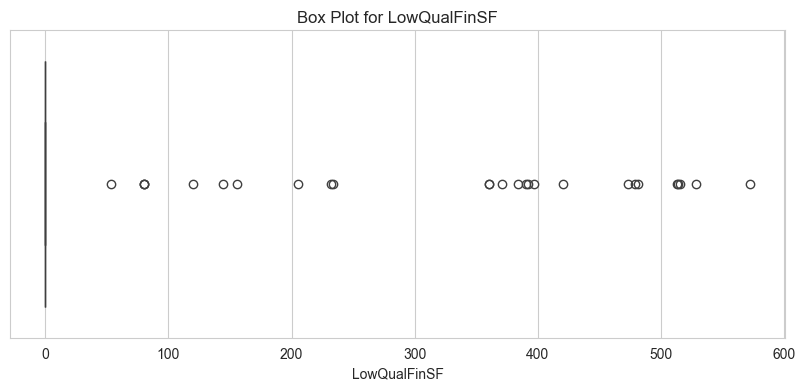

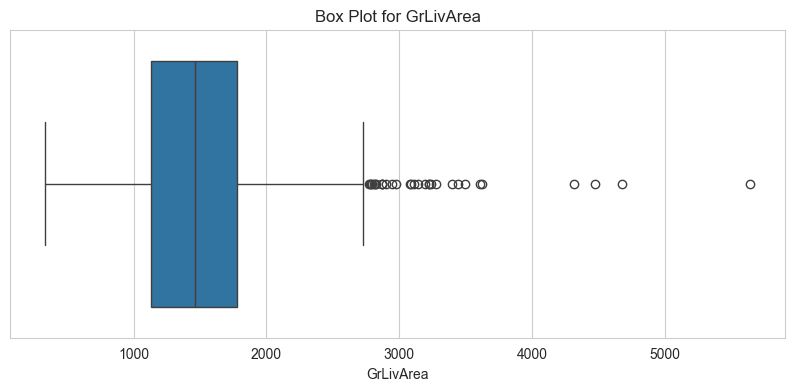

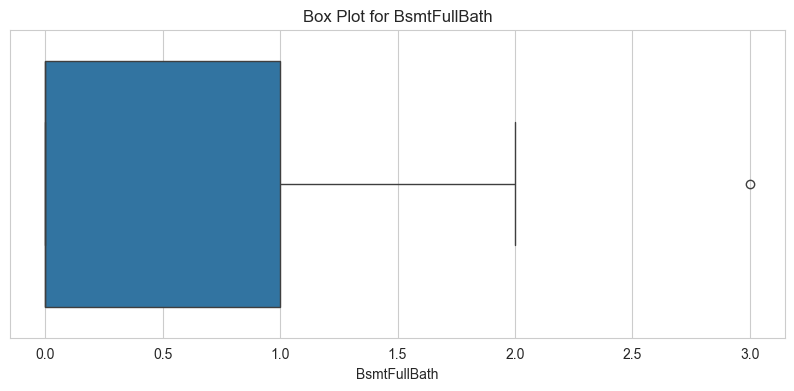

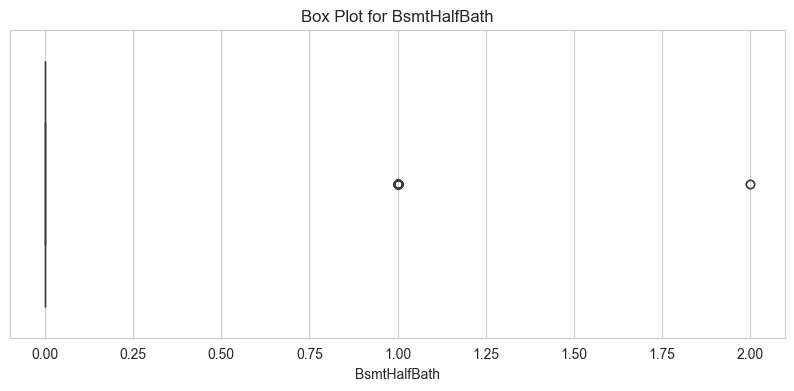

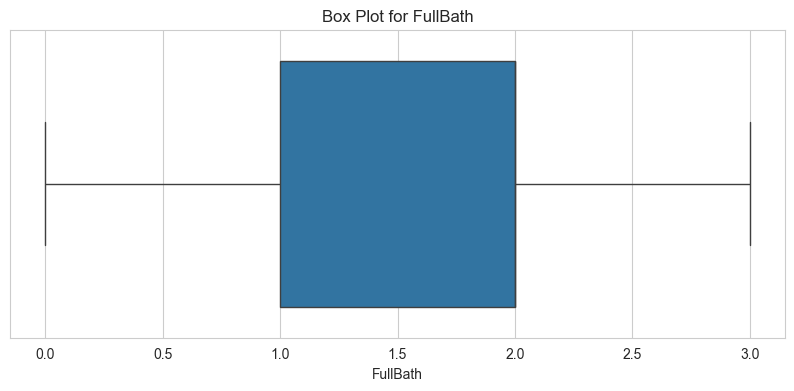

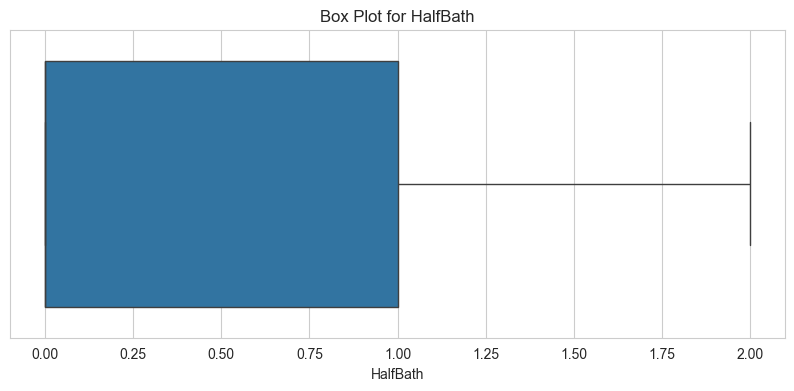

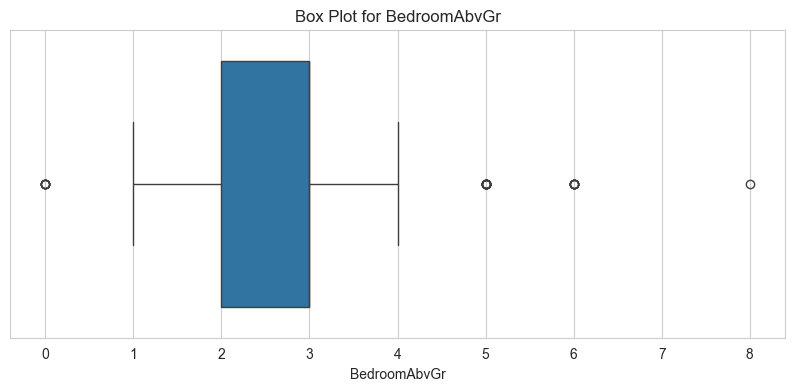

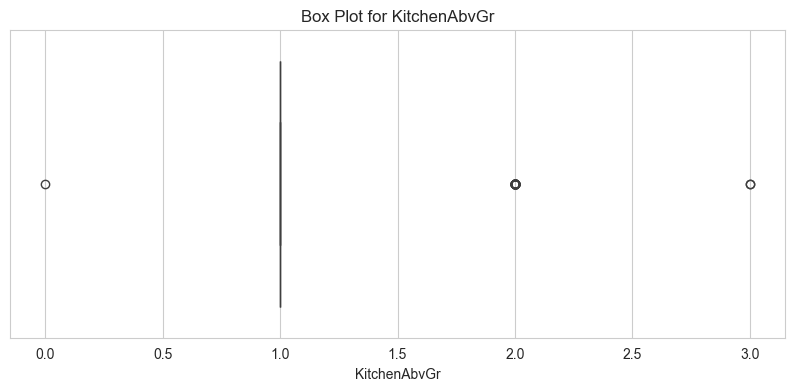

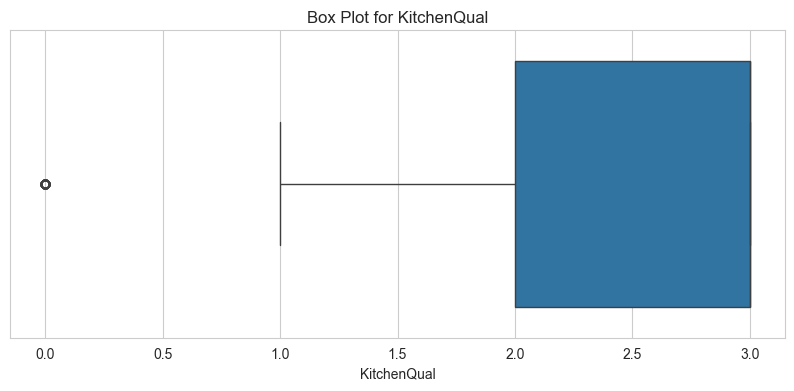

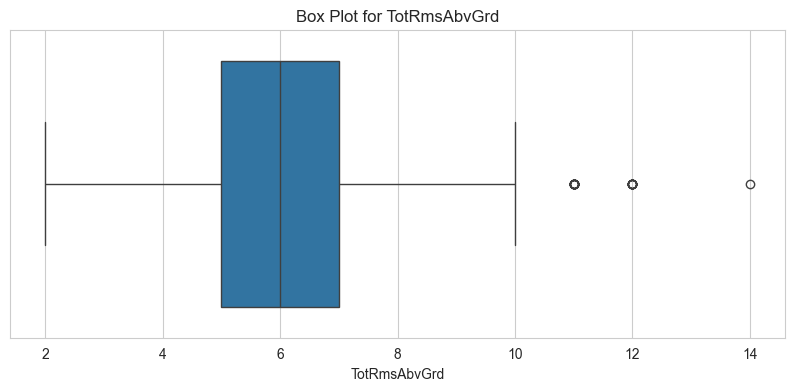

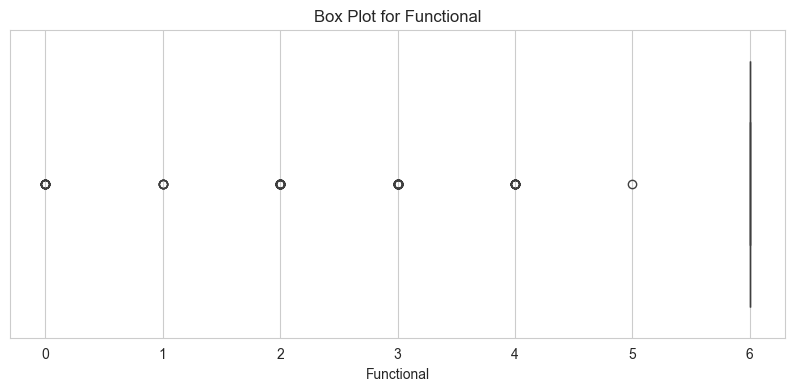

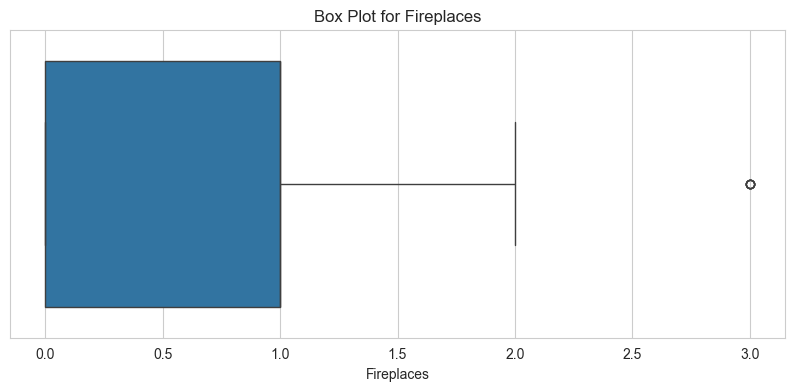

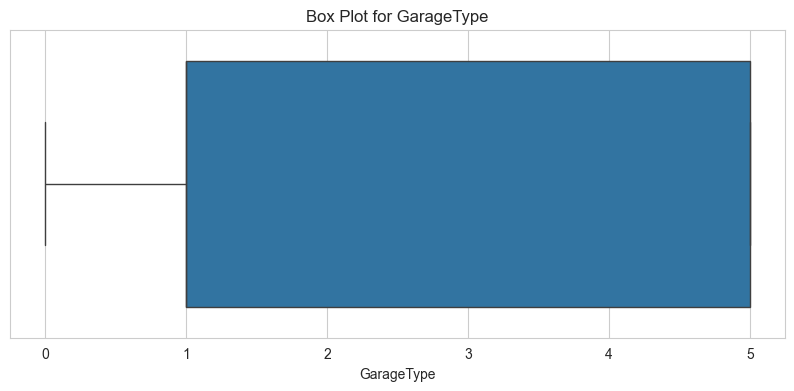

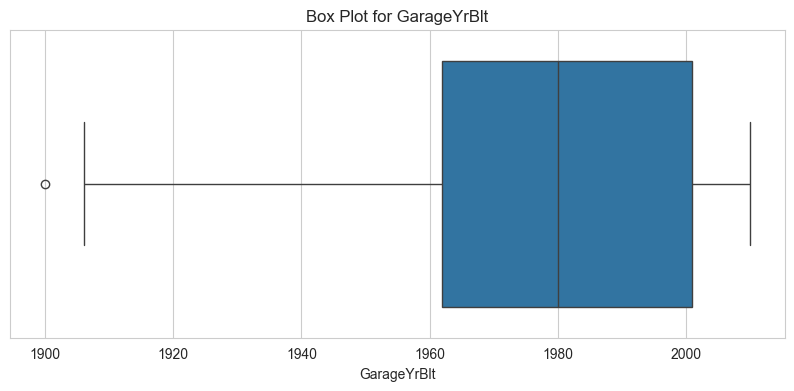

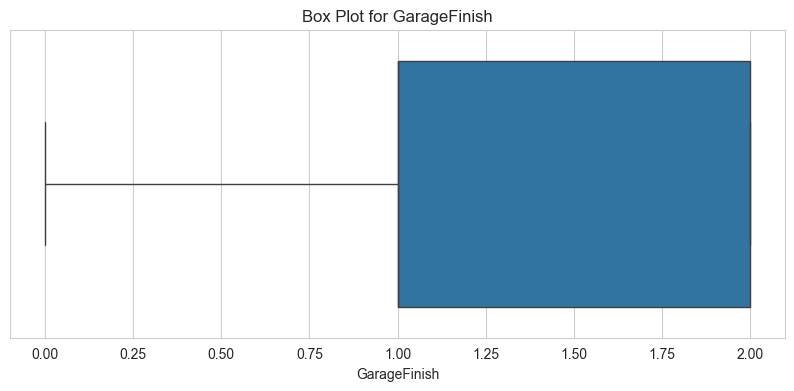

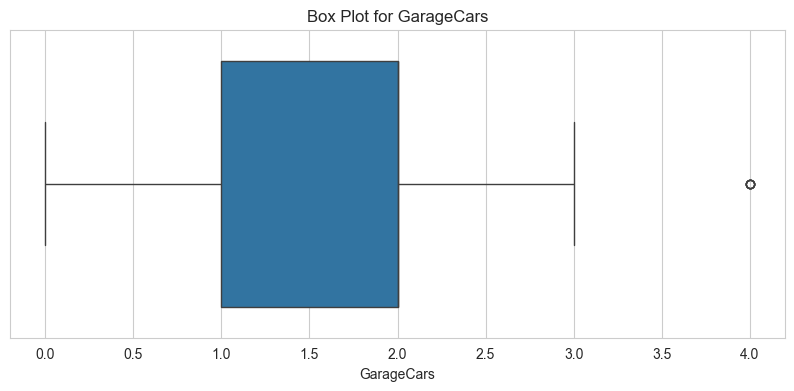

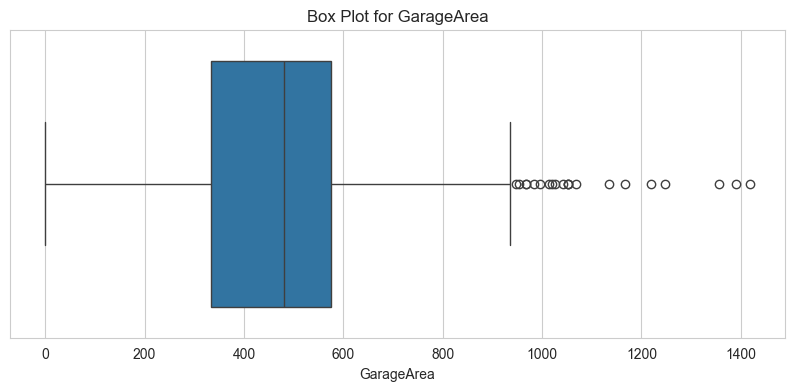

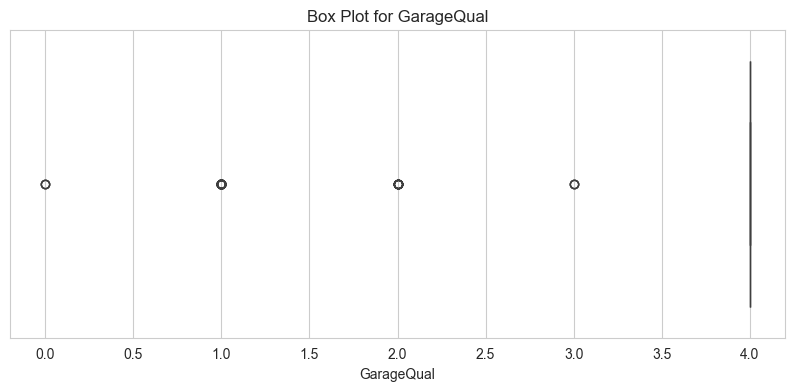

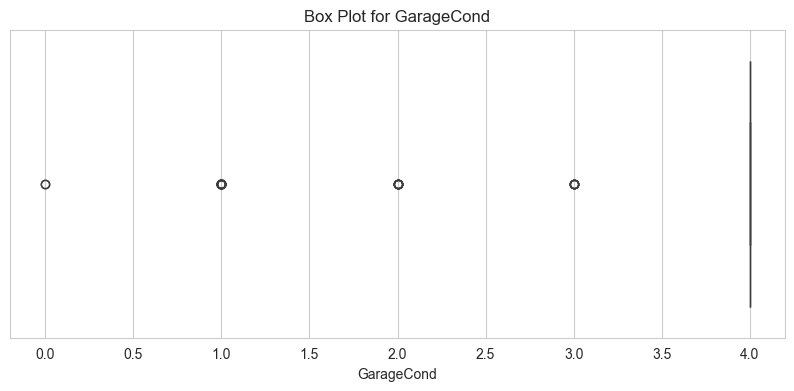

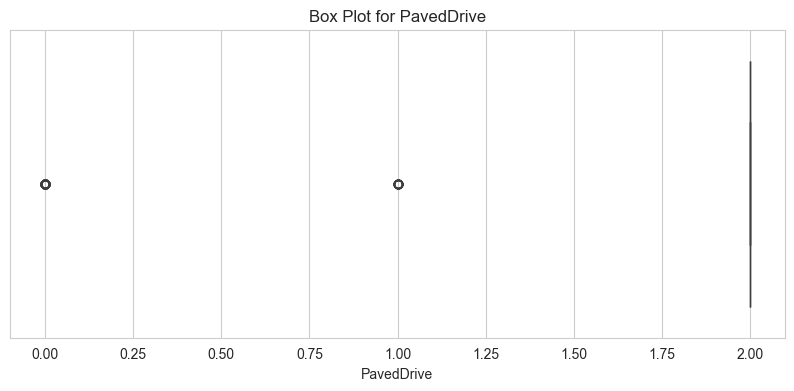

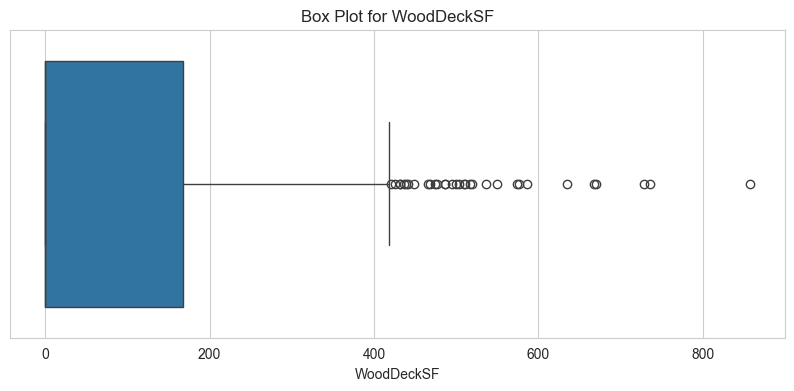

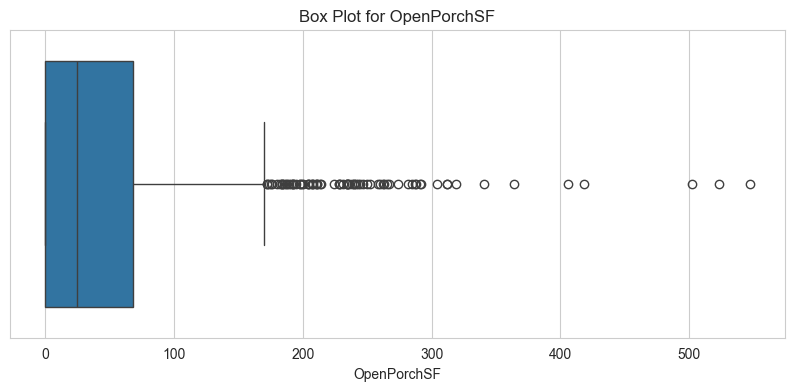

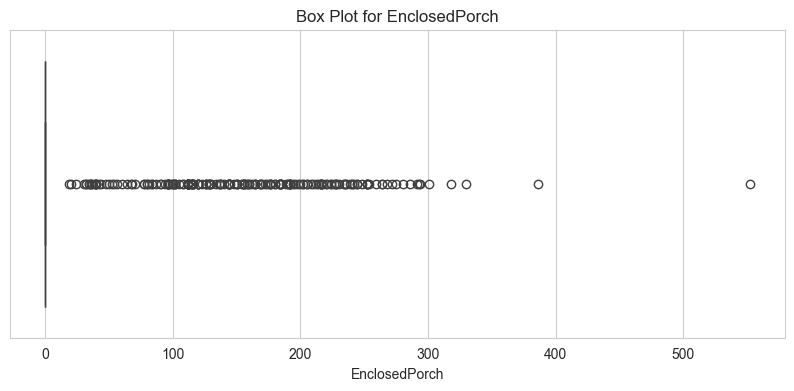

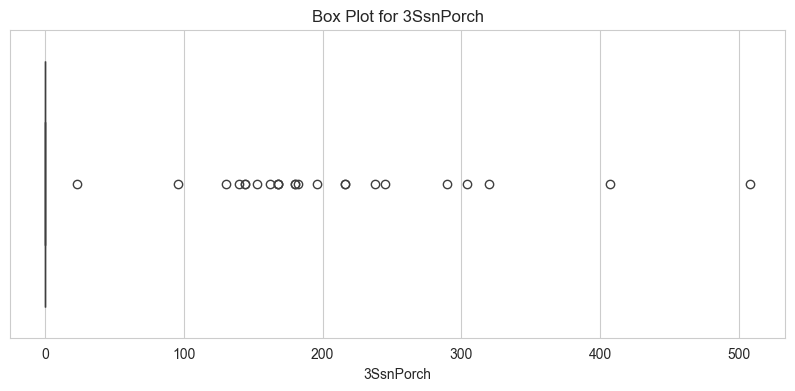

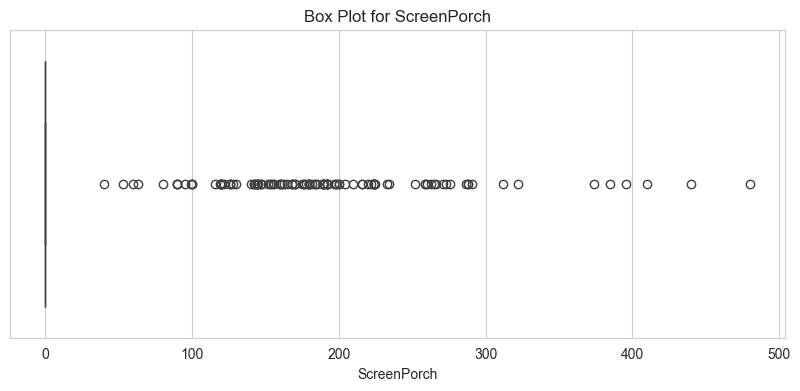

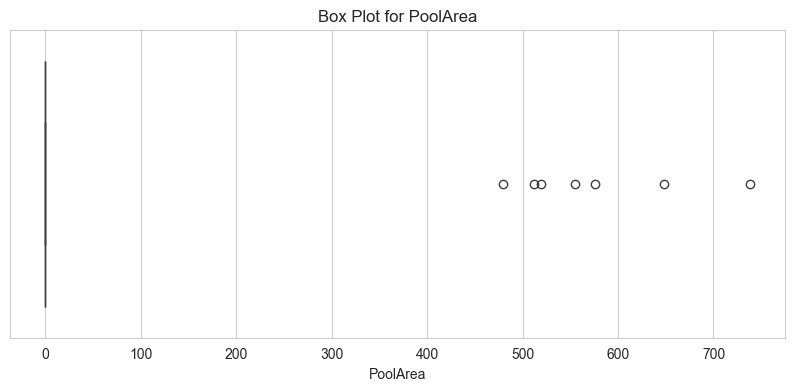

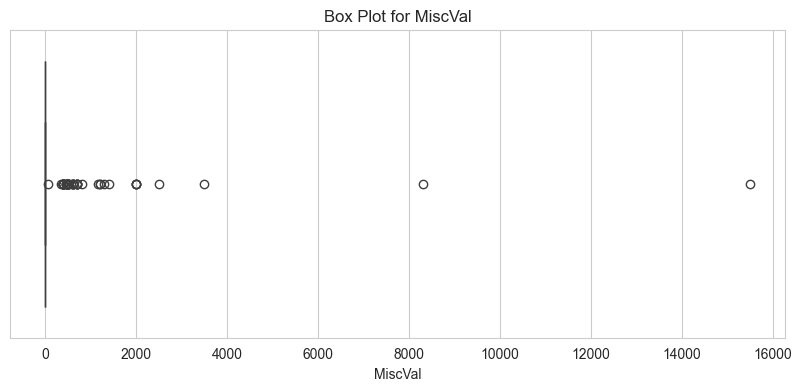

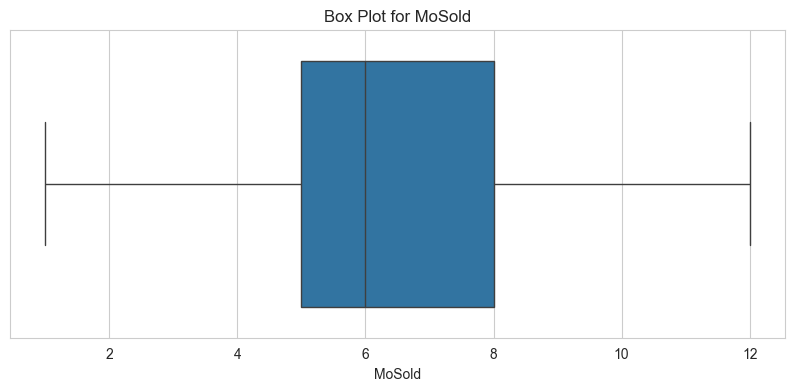

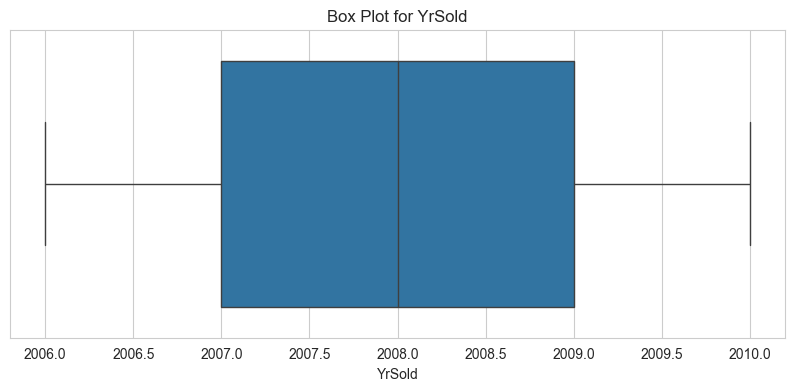

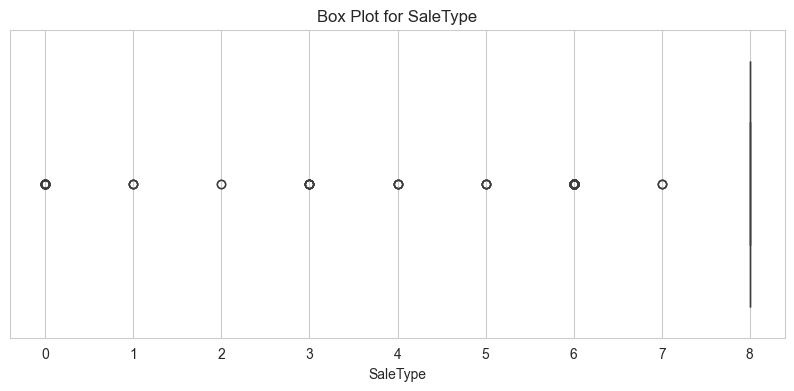

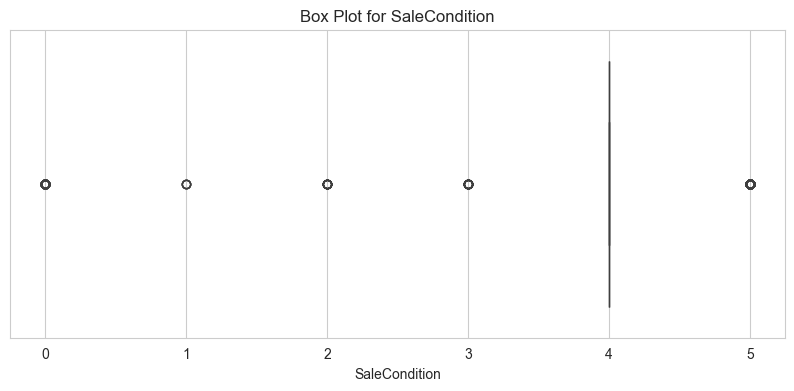

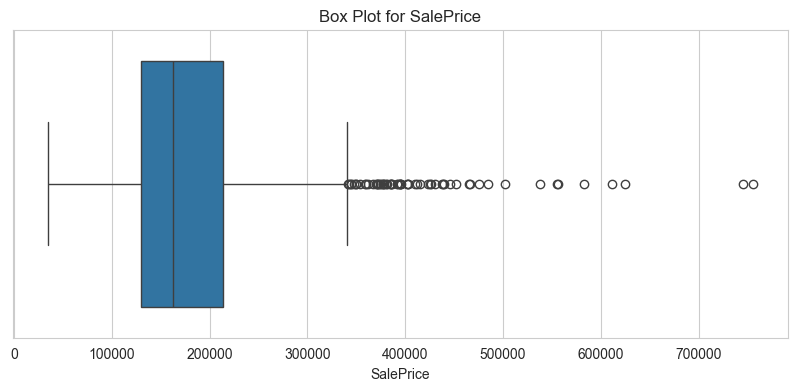

In [19]:
# Creating box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)
    plt.show()

Box Plot for OverallQual: There's one outlier indicating a property with much lower quality than most. The distribution is left-skewed, suggesting that most properties are of average or above-average quality.

Box Plot for OverallCond: There are a few outliers at the lower end, indicating some properties are in worse condition than the typical property.

Box Plot for YearBuilt: A couple of outliers are present on the lower end, indicating some very old properties compared to the rest of the data.

Box plot for GrLivArea: A median living area around 1500 square feet, with most of the data falling between approximately 1100 and 2000 square feet, which represents the interquartile range. The data points extending beyond the upper whisker, up to around 3000 square feet, suggest a standard range of property sizes, while the individual points beyond this range, particularly those over 4000 square feet, indicate the presence of outliers.

In [20]:
# Set the threshold for the number of outliers
outlier_threshold = len(df) * 0.1  # 10% of the length of df

# Identify columns with more than 10% outliers
outlier_features = []
for column in numerical_features:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]
    outliers_count = outliers.shape[0]
    if outliers_count > outlier_threshold:
        outlier_features.append((column, outliers_count))

# Step 3: Print the columns with more than 10% outliers
print("Columns with more than 10% outliers:")
for feature, count in outlier_features:
    print(f"{feature} has {count} outliers.")


Columns with more than 10% outliers:
MSZoning has 309 outliers.
LandContour has 149 outliers.
Condition1 has 200 outliers.
BldgType has 240 outliers.
RoofStyle has 319 outliers.
ExterCond has 178 outliers.
BsmtExposure has 221 outliers.
BsmtFinType2 has 166 outliers.
BsmtFinSF2 has 167 outliers.
EnclosedPorch has 208 outliers.
SaleType has 193 outliers.
SaleCondition has 262 outliers.


In [21]:
# Assuming all the columns with less than 8 unique values are categorical
threshold = 8  # Threshold
categorical_columns = []

for column in df.columns:
    if df[column].nunique() <= threshold :
        categorical_columns.append(column)

print(f"Number of Categorical Columns: {len(categorical_columns)}")
print("Categorical Columns:", categorical_columns)

Number of Categorical Columns: 42
Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'YrSold', 'SaleCondition']


## 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

In [22]:
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = categorical_columns
    pvals = []
    for c in categorical_columns:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

k = anova(df)
top_ten = k.head(10)
print(top_ten)

        features           pval
35    GarageCars  1.121129e-211
12     ExterQual  1.439551e-204
15      BsmtQual  2.078120e-194
30   KitchenQual  3.032213e-192
26      FullBath  3.802188e-129
34  GarageFinish  5.993319e-111
14    Foundation   5.791895e-91
32    Fireplaces   4.421001e-83
21     HeatingQC   2.667062e-67
18  BsmtFinType1   3.598398e-66


In [23]:
# Get all columns from the DataFrame
all_columns = set(df.columns)
# Convert categorical_columns to a set for efficient operations
categorical_columns_set = set(categorical_columns)

# Find columns in df that are not in categorical_columns
non_categorical_columns = list(all_columns - categorical_columns_set)

# Print the non-categorical columns
print(f"Number of non-categorical columns: {len(non_categorical_columns)}")
# Print the non-categorical columns
print("Non-categorical columns:", non_categorical_columns)

Number of non-categorical columns: 32
Non-categorical columns: ['LowQualFinSF', 'MSSubClass', 'OverallCond', 'Exterior1st', 'GrLivArea', 'OverallQual', 'BsmtFinSF2', 'GarageArea', 'MiscVal', 'MasVnrArea', 'LotFrontage', 'WoodDeckSF', '1stFlrSF', 'Neighborhood', 'TotalBsmtSF', '3SsnPorch', 'SaleType', 'YearBuilt', 'LotArea', 'EnclosedPorch', 'Condition1', 'YearRemodAdd', 'MoSold', 'TotRmsAbvGrd', 'Exterior2nd', '2ndFlrSF', 'OpenPorchSF', 'BsmtUnfSF', 'SalePrice', 'ScreenPorch', 'GarageYrBlt', 'BsmtFinSF1']


In [24]:
# Assume df is your DataFrame and 'SalePrice' and `non_categorical_columns` are its columns

# Compute pairwise correlation of columns
correlation_matrix = df[non_categorical_columns].corr()

# Get absolute correlation with 'SalePrice'
saleprice_corr = correlation_matrix['SalePrice'].abs()

# Get top 10 features with the highest correlation with 'SalePrice'
top_ten_correlated_features = saleprice_corr.sort_values(ascending=False).head(11)

print(top_ten_correlated_features)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
Name: SalePrice, dtype: float64


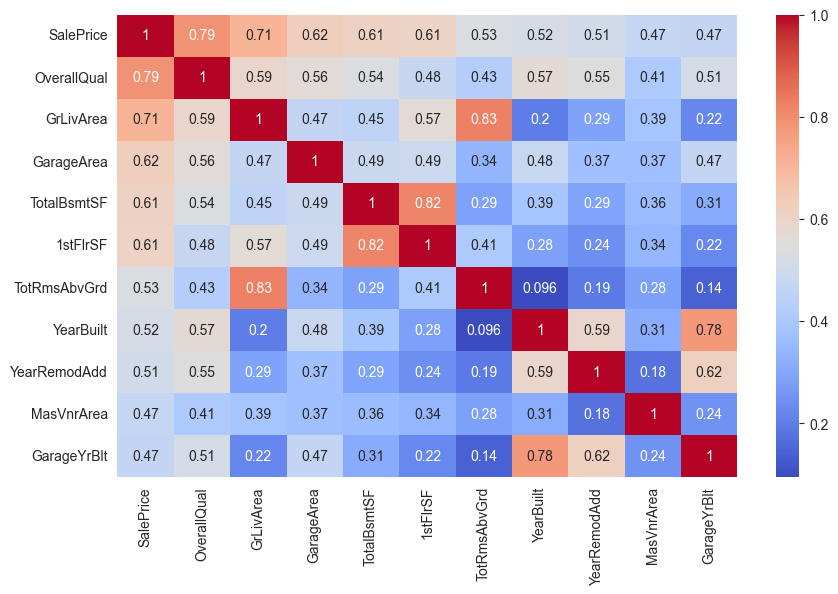

In [25]:

subset = df[top_ten_correlated_features.index]

# compute pairwise correlation of columns
correlation_matrix_subset = subset.corr()

plt.figure(figsize=(10, 6))

# create a heatmap
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')

plt.show()

'OverallQual' has the strongest correlation (0.79) with SalePrice, but it also has a strong correlaiton with all the other features. To avoid multi-colinearliarty, we have not included OverallQual in the model.

'GrLivArea', 'YearBuilt', 'GarageArea', and 'MasVnrArea', do not have strong correlation amongst themselves, therefore we proceed with these variables.

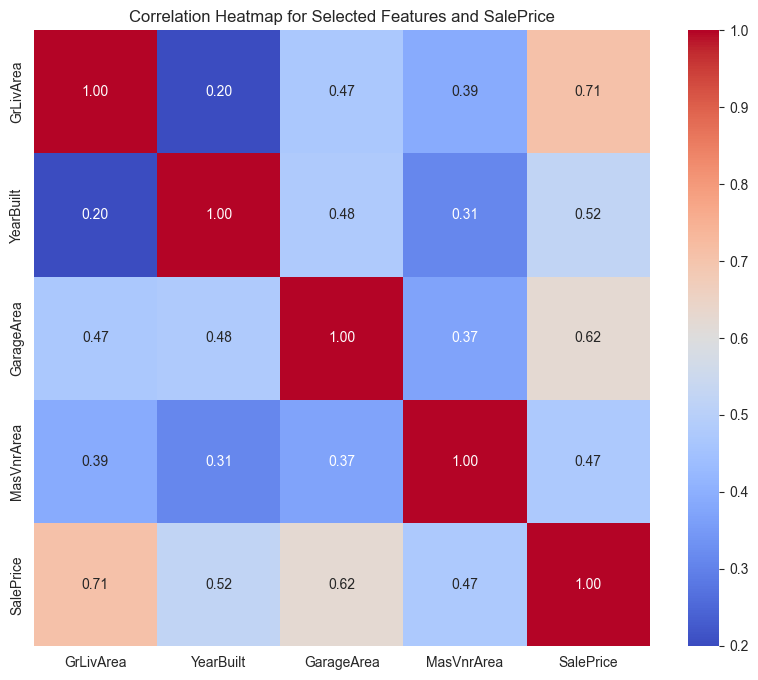

In [26]:
# Define the features for the heatmap
features = ['GrLivArea', 'YearBuilt', 'GarageArea', 'MasVnrArea', 'SalePrice']

# Calculate the correlation matrix for these features
correlation_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Selected Features and SalePrice')
plt.show()

Statistical Summary: GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


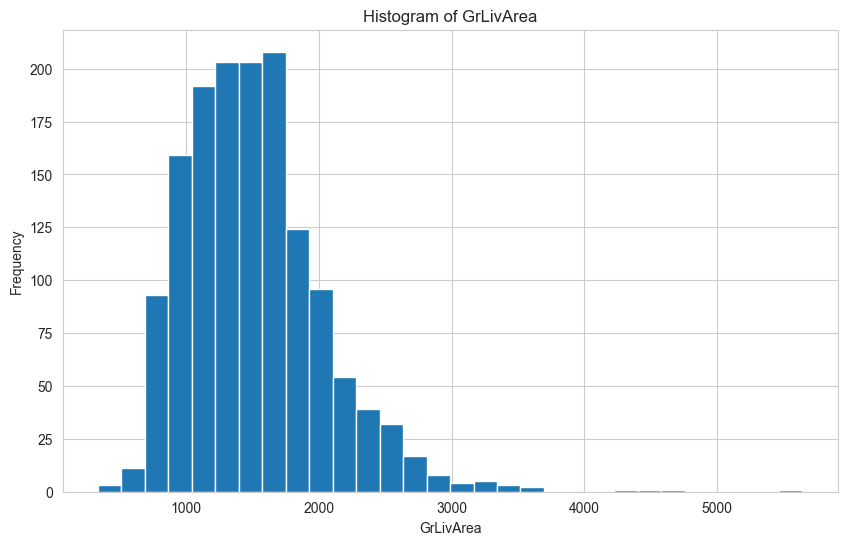

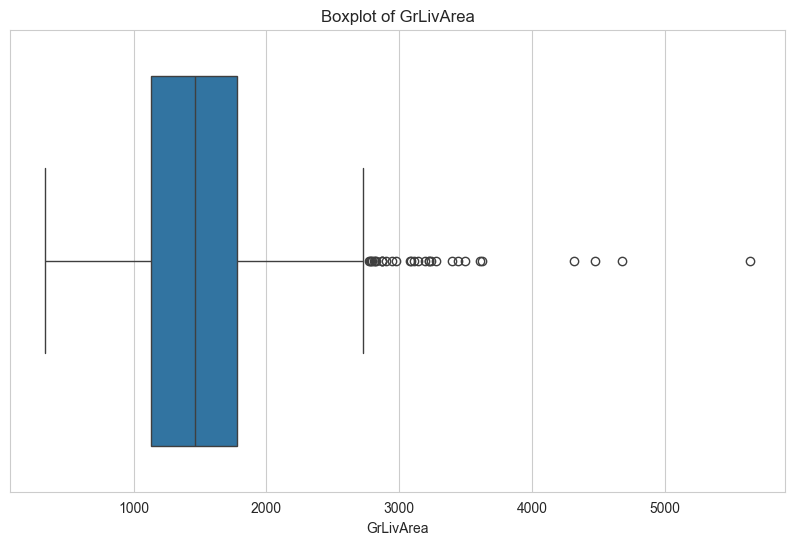

Statistical Summary: YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


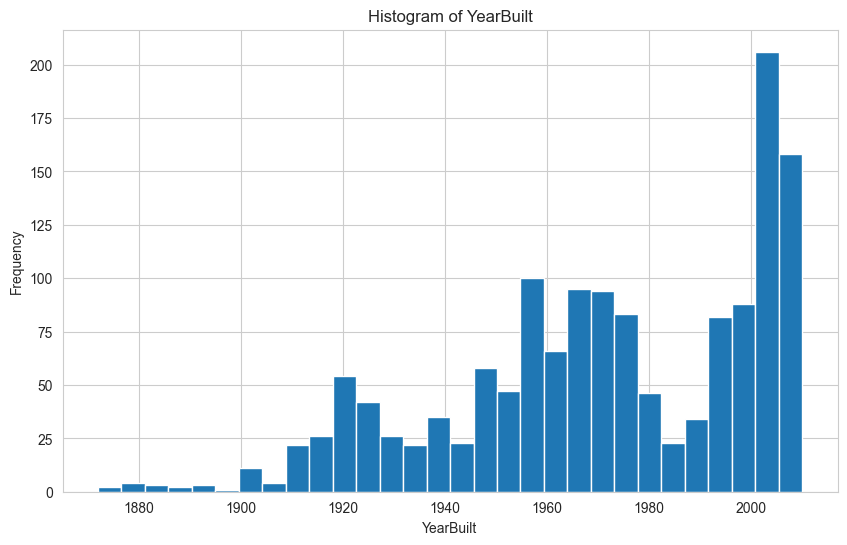

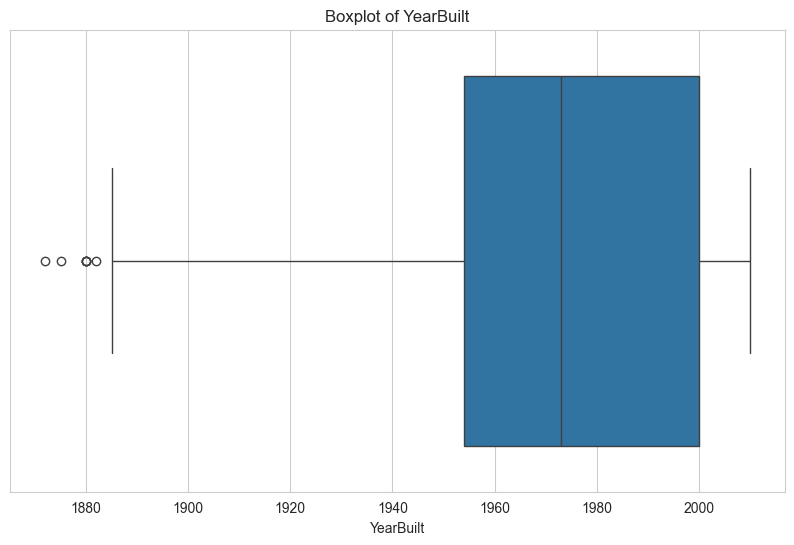

Statistical Summary: GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


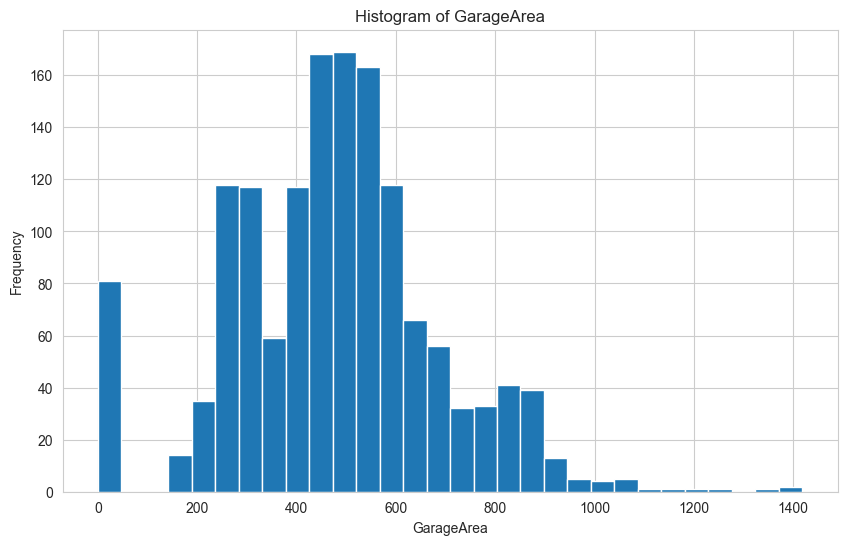

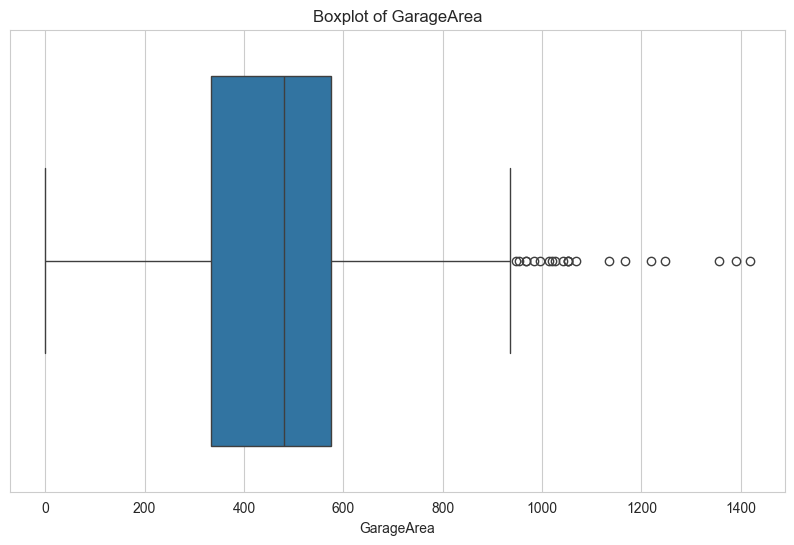

Statistical Summary: MasVnrArea
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


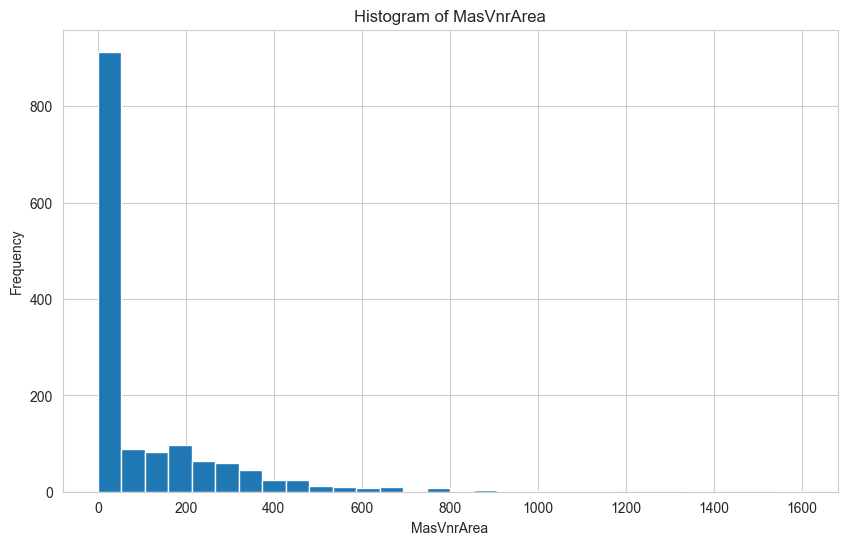

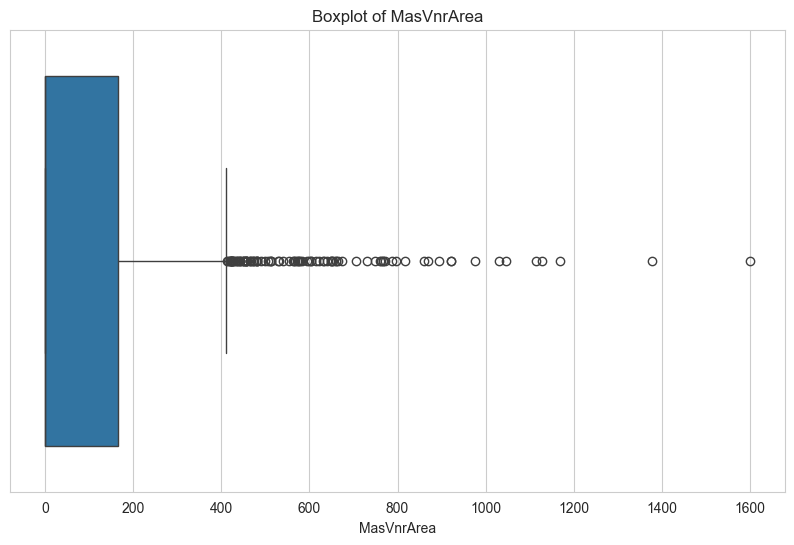

In [27]:
features.remove('SalePrice')

# Loop through the features and print statistical summary, create histograms, and create boxplots
for feature in features:
    print("Statistical Summary:", feature)
    print(df[feature].describe())
    
    plt.figure(figsize=(10, 6))
    df[feature].hist(bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

1.	Histograms of `GrLivArea` and `GarageArea`: Both variables show a right-skewed distribution with a tail extending to the right. This indicates that most of the houses have a living area and garage area within a moderate range, but there are a few houses with exceptionally large areas.
2.	Boxplot of `GrLivArea` and `GarageArea`: The boxplots confirm the right-skew seen in the histograms, with several outliers present on the higher end of the range. This suggests that there are some houses with living areas and garage areas that are significantly larger than the typical house in this dataset.
3.	Histogram of `YearBuilt`: The distribution for the year houses were built shows an increase in frequency towards the more recent years. This suggests that the dataset includes many newer homes, with fewer older homes.
4.	Boxplot of `YearBuilt`: The boxplot for `YearBuilt` doesn't indicate many outliers, which suggests that while there are older homes in the dataset, their numbers aren't exceptionally low compared to the distribution.
5.	Histogram of `MasVnrArea`: This variable also shows a right-skewed distribution. Most houses have a small masonry veneer area, with a few houses having a much larger area.
6.	Boxplot of `MasVnrArea`: The boxplot reveals a number of outliers on the higher end. This suggests that the typical house has a modest amount of masonry veneer, with a few houses having significantly more.

In summary, `GrLivArea`, `GarageArea`, and `MasVnrArea` display right-skewed distributions, indicating the presence of high-value outliers. `YearBuilt` shows a trend towards newer homes, with a relatively uniform distribution and fewer extreme values. When considering these variables for regression analysis with `SalePrice`, note that the skewed variables might benefit from transformation to reduce the impact of outliers. Additionally, the relationship between `SalePrice` and these features may be non-linear, especially in the presence of such skewness and outliers.


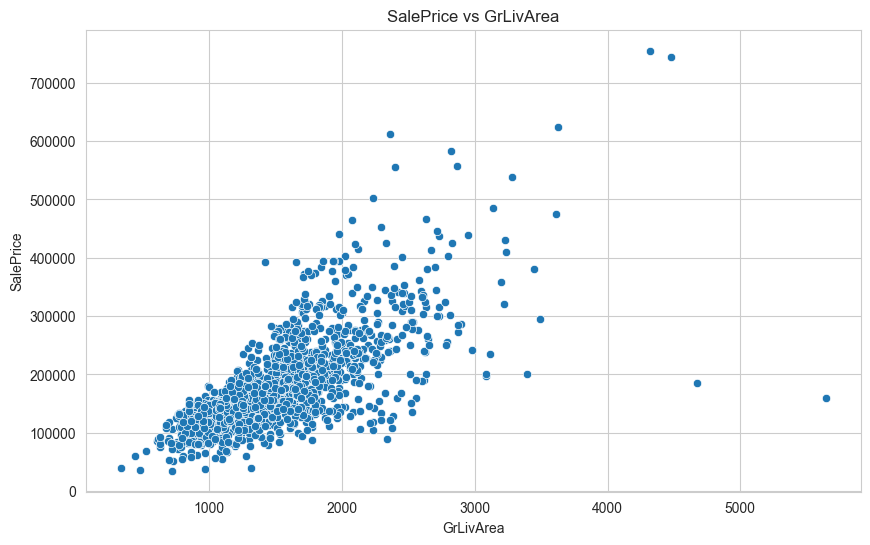

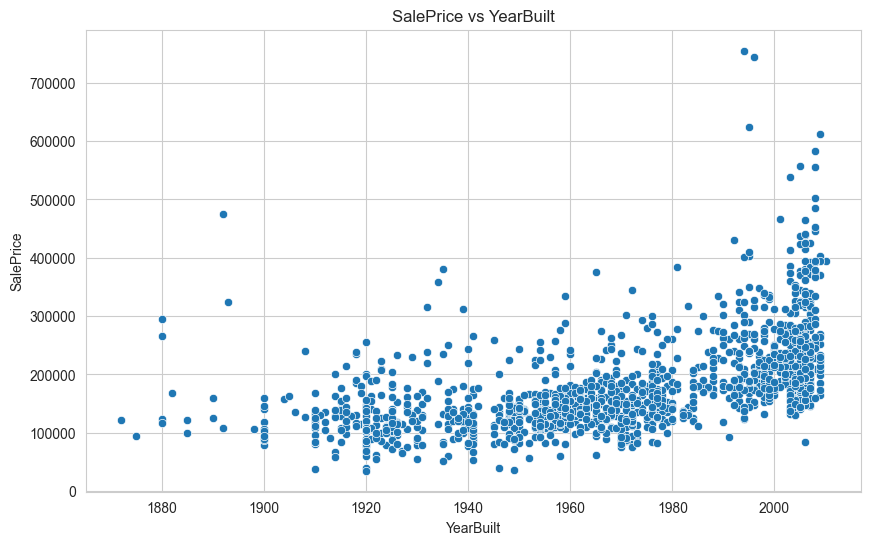

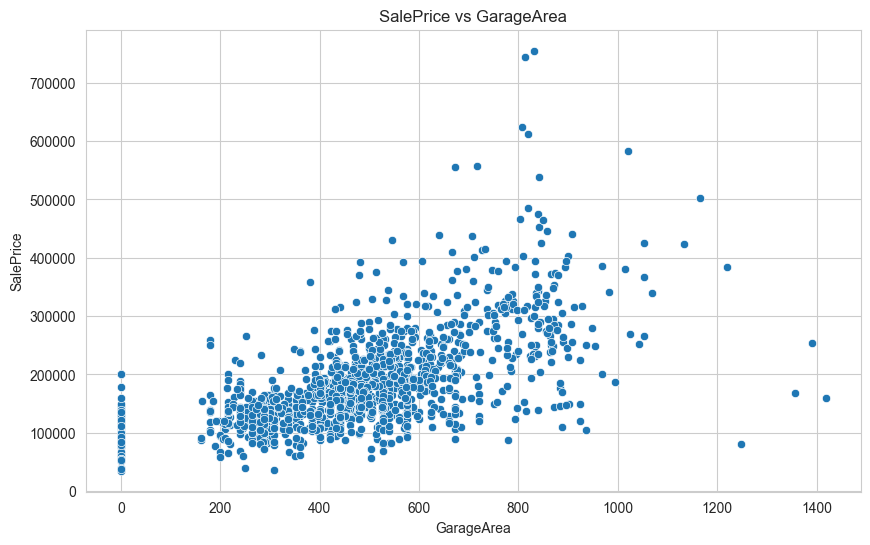

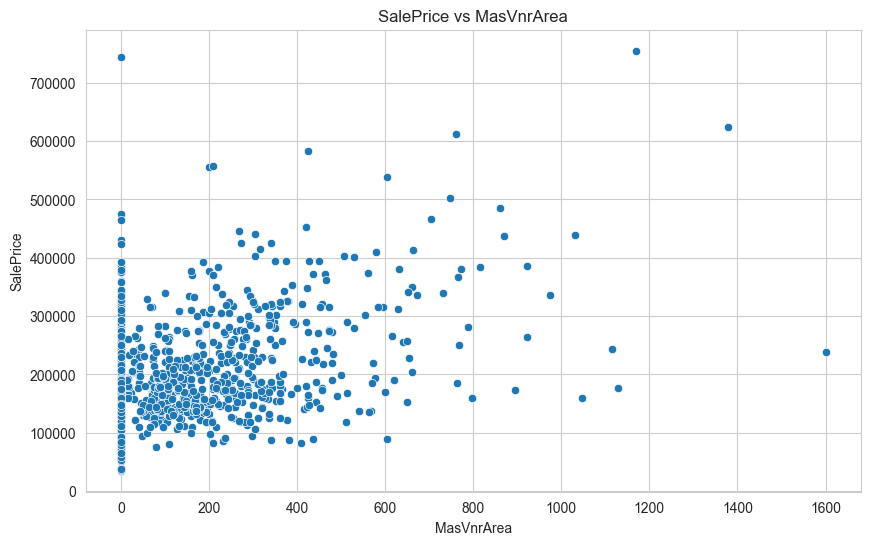

In [28]:
# Loop through the features and create scatter plots against SalePrice
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

1.	SalePrice vs GrLivArea:
•	There's a positive correlation between `GrLivArea` (above-grade living area square feet) and `SalePrice`. As the living area increases, the sale price tends to increase as well.
•	The relationship appears to be linear with some outliers, especially for larger living areas where the sale price varies more widely.
2.	SalePrice vs YearBuilt:
•	There's a general trend indicating that newer houses tend to sell for higher prices, but the relationship is not as strong or linear as with `GrLivArea`.
•	There are outliers, particularly with some newer homes not fetching as high a price as others, possibly due to factors not captured in this plot (like location, style, or other amenities).
3.	SalePrice vs GarageArea:
•	A moderate positive correlation exists between `GarageArea` and `SalePrice`, with some spread in the data points.
•	Similar to `GrLivArea`, larger garage areas seem to be associated with higher sale prices, but with notable variability and some outliers.
4.	SalePrice vs MasVnrArea:
•	The correlation between `MasVnrArea` (masonry veneer area in square feet) and `SalePrice` is less clear. While there seems to be a slight positive trend, the relationship is not as strong, and there is a lot of spread in the sale prices for houses with small to moderate masonry veneer areas.
•	There are several outliers and a wide distribution of sale prices for homes with smaller `MasVnrArea`, suggesting other factors may play a significant role in determining the sale price.


## 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

#### To consolidate the house size-related features into a single variable, we sum the following attributes: 'GrLivArea' (above-grade living area square feet), '1stFlrSF' (first floor square feet), '2ndFlrSF' (second floor square feet), 'BsmtFinSF1: Type 1 finished square feet', and 'LowQualFinSF' (low-quality finished square feet across all floors). This new aggregated variable represents the total living area of the house in square feet, capturing the comprehensive size across all floors and quality levels.

In [29]:
# Adding the variables
df['TotalSF'] = df['GrLivArea'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['BsmtFinSF1'] + df['LowQualFinSF']


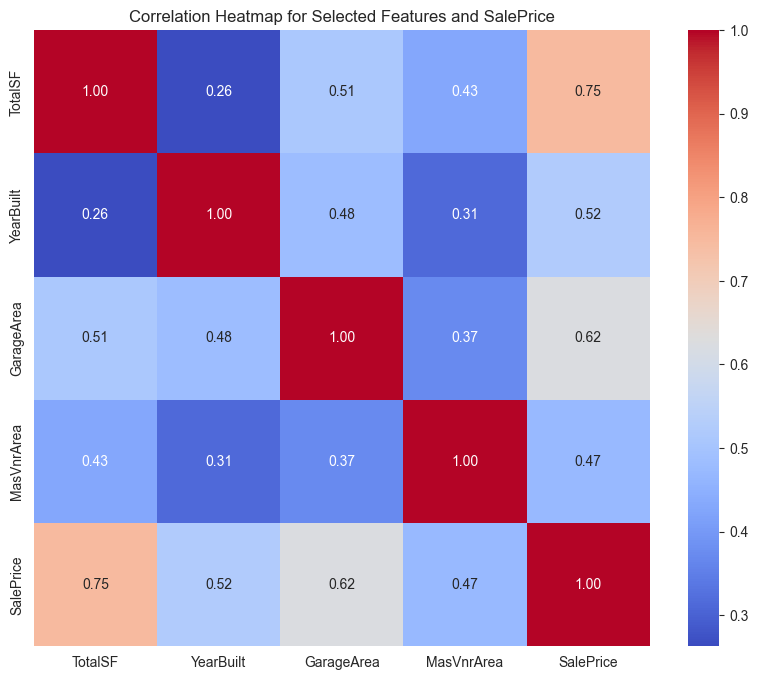

In [30]:
features = ['TotalSF', 'YearBuilt', 'GarageArea', 'MasVnrArea', 'SalePrice']

# Calculate the correlation matrix for these features
correlation_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Selected Features and SalePrice')
plt.show()

The correlation of TotalSF is 0.75 with SalePrice, whereas that of GrLivArea was 0.71. When comparing to the other three variables, the corrleation of TotalSF has slightly increased vis-a-vis GrLivArea.

Statistical Summary: TotalSF
count     1460.000000
mean      3474.567123
std       1229.680446
min        668.000000
25%       2656.000000
50%       3277.500000
75%       4092.500000
max      16928.000000
Name: TotalSF, dtype: float64


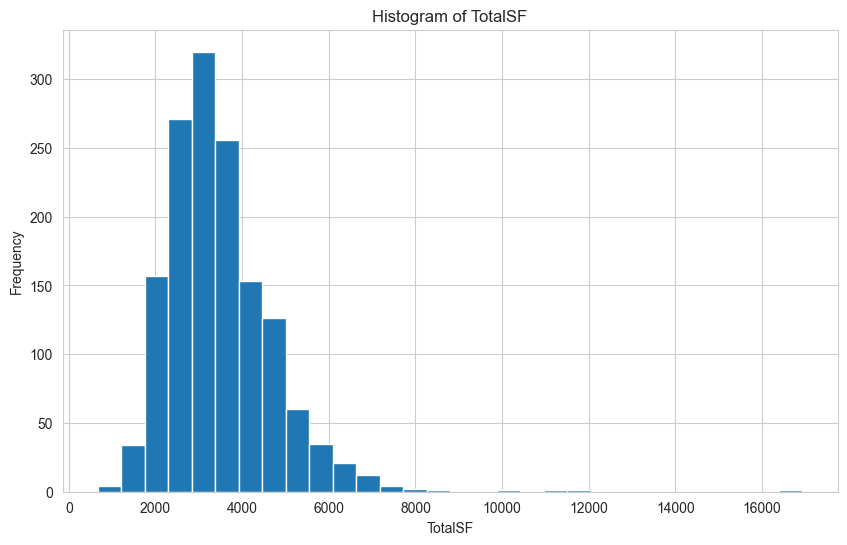

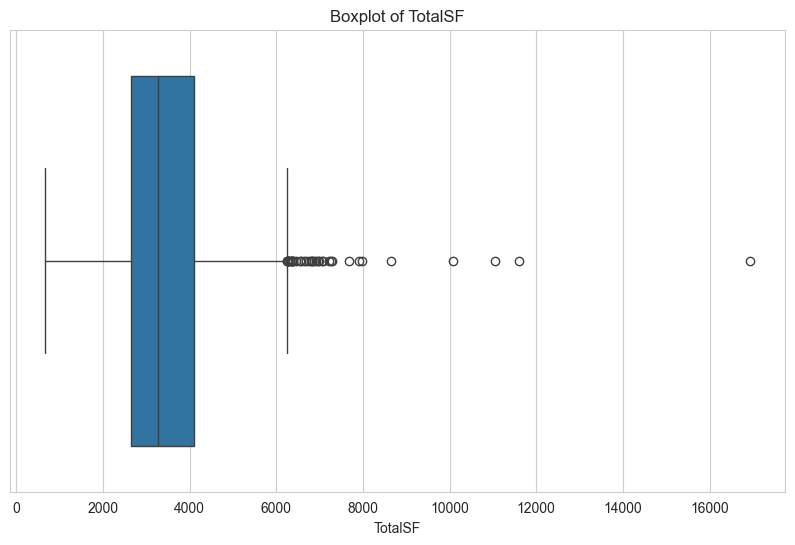

In [31]:
# Exploring TotalSF
print("Statistical Summary:", 'TotalSF')
print(df['TotalSF'].describe())

plt.figure(figsize=(10, 6))
df['TotalSF'].hist(bins=30)
plt.title(f'Histogram of {'TotalSF'}')
plt.xlabel('TotalSF')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TotalSF')
plt.title(f'Boxplot of {'TotalSF'}')
plt.show()

The `TotalSF` variable, representing the total square footage of houses, exhibits a right-skewed distribution with most houses clustered in the moderate square footage range but with a long tail of outliers indicating some houses have significantly larger areas. The median square footage is lower than the mean, which is skewed upwards by these larger properties, and the considerable standard deviation reflects a wide variance in house sizes. The presence of outliers suggests that while `TotalSF` could be a strong predictor for `SalePrice`.

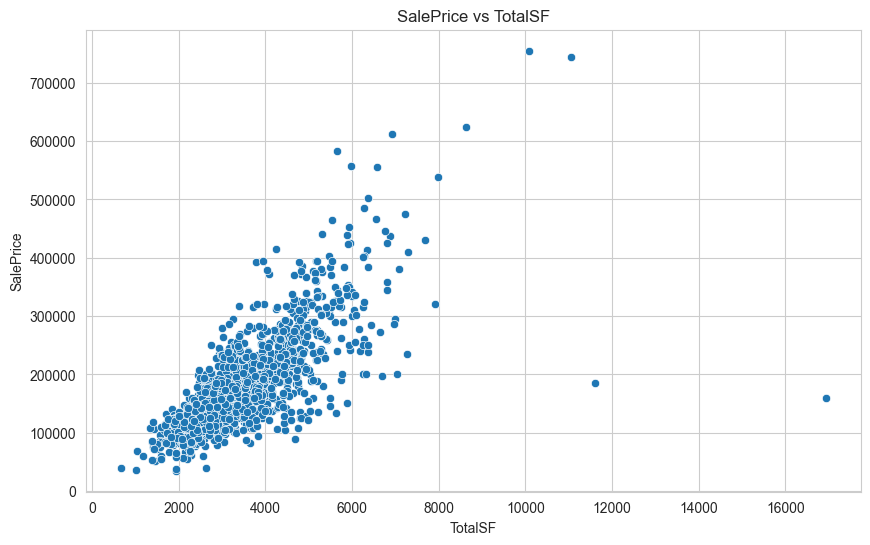

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['TotalSF'], y='SalePrice')
plt.title(f'SalePrice vs TotalSF')
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.show()

The scatter plot depicting `SalePrice` versus `TotalSF` indicates a positive correlation between the total square footage of houses and their sale prices. As the total square footage increases, there tends to be an increase in sale price, suggesting that larger homes generally sell for more. The plot also shows a concentration of data points in the lower to mid-range of total square footage, with fewer homes on the larger end, reflecting the right-skewed distribution observed in the histogram. There are outliers with both unusually high square footage and sale prices, which could influence any predictive modeling efforts and might need to be addressed. This trend is consistent with real estate market expectations where the size of a property is a key determinant of its value.

## 5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [33]:
features_description = df[features].describe()
# Print the descriptive statistics
print('Statistical Summary of Features before MinMax Scaling:\n' , features_description)
# Assuming you have a DataFrame called 'df' with your data

# Features for min-max scaling
features = ['TotalSF', 'YearBuilt', 'GarageArea', 'MasVnrArea', 'SalePrice']

# Perform min-max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Print the descriptive statistics
print('Statistical Summary of Features after MinMax Scaling:\n' , df_scaled[features].describe())


Statistical Summary of Features before MinMax Scaling:
             TotalSF    YearBuilt   GarageArea   MasVnrArea      SalePrice
count   1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean    3474.567123  1971.267808   472.980137   103.117123  180921.195890
std     1229.680446    30.202904   213.804841   180.731373   79442.502883
min      668.000000  1872.000000     0.000000     0.000000   34900.000000
25%     2656.000000  1954.000000   334.500000     0.000000  129975.000000
50%     3277.500000  1973.000000   480.000000     0.000000  163000.000000
75%     4092.500000  2000.000000   576.000000   164.250000  214000.000000
max    16928.000000  2010.000000  1418.000000  1600.000000  755000.000000
Statistical Summary of Features after MinMax Scaling:
            TotalSF    YearBuilt   GarageArea   MasVnrArea    SalePrice
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000
mean      0.172606     0.719332     0.333554     0.064448     0.202779
std       

Before min-max scaling, the features in the dataset display a wide range of values with varying degrees of spread, as indicated by their standard deviations, particularly `TotalSF` and `SalePrice` showing large spreads. After scaling, all features are uniformly transformed to a [0, 1] scale, which normalizes their distributions for comparability and suitability for scale-sensitive algorithms, while preserving their inherent distribution characteristics. The rescaling is evident in the normalized mean values and standard deviations, which are now proportionally smaller, reflecting the unified scale across all features.

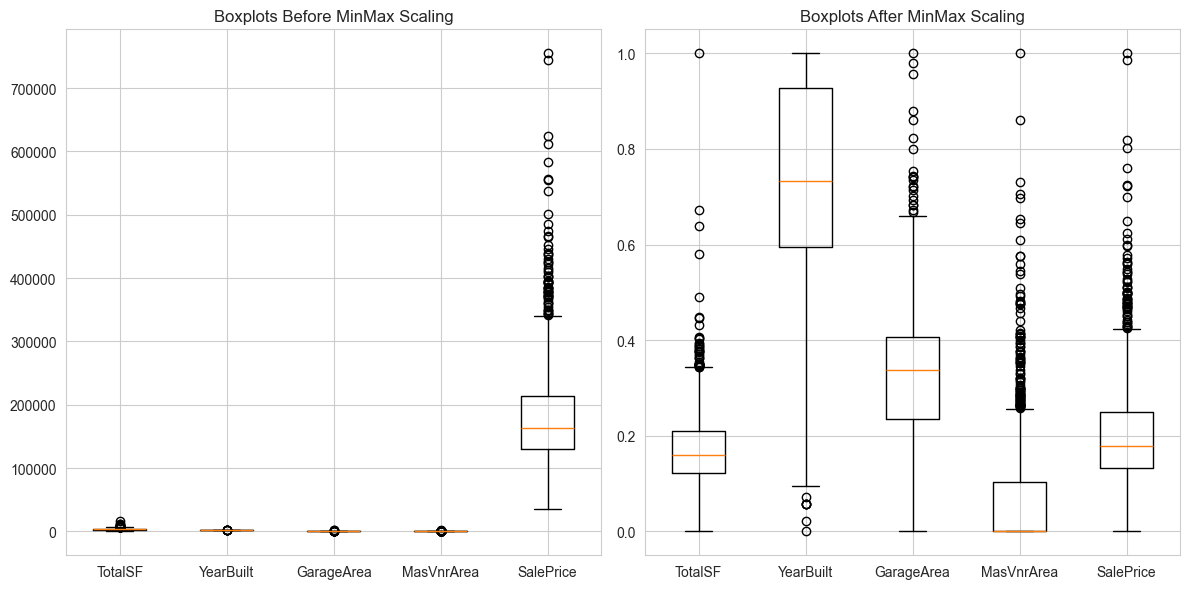

In [34]:

# Plotting the boxplots before scaling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df[features].values, labels=features)
plt.title('Boxplots Before MinMax Scaling')

# Plotting the boxplots after scaling
plt.subplot(1, 2, 2)
plt.boxplot(df_scaled[features].values, labels=features)
plt.title('Boxplots After MinMax Scaling')

plt.tight_layout()
plt.show()

In the right plot (after scaling), all features are now on the same [0, 1] scale, and their distributions can be easily compared. The medians, quartiles, and outliers are now visible on a consistent scale, which is especially important for algorithms that depend on the distance between data points. Outliers remain visible post-scaling, but they no longer dominate the scale of the plot. This normalization enables a more meaningful comparison across features and is necessary for many machine learning models to perform optimally.